In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import os, sys, re

In [4]:
regex = re.compile(r'\d+')

In [5]:
data_folder = os.path.join('/','Users', 'cdesio', 'UoB', 'leakage')

In [6]:
extracted_folder = os.path.join(data_folder, 'extracted')

In [7]:
fnames = os.listdir(extracted_folder)

In [8]:
Temps = []
Tints = []

In [9]:
for fname in fnames:
    split = fname.split('_')
    T = split[0]
    tint = split[1]
    Temps.append(float(T[1:]))
    Tints.append(int(regex.findall(tint)[0]))
    

In [10]:
np.unique(Temps)

array([-20. , -15. , -10. ,  -5. ,   0.1,   4.9,  10. ,  14.9,  20. ,
        24.8,  30. ])

In [11]:
np.unique(Tints)

array([ 1753440,  2454816,  3156192,  3857568,  4558944,  5260320,
        6663072,  6663702,  7364448,  8767200,  9468576, 10169952,
       10871328, 11572704, 13676832, 15780960, 21391968, 26301600,
       31912608, 33315360, 35068800, 52603224])

In [12]:
def sel_files(flist, ts=None):
    selected = []
    if len(ts)>0:
        for t in ts:
            for f in flist:
                if str(t) in f:
                    selected.append(f)
    return sorted(selected)
              

In [13]:
list(set(sel_files(fnames, ts = np.unique(Tints)))-set([]))

['T4.9_Tint2454816_sh10.npz',
 'T20.0_Tint10169952_sh10.npz',
 'T4.9_Tint15780960_sh10.npz',
 'T0.1_Tint7364448_sh10.npz',
 'T0.1_Tint1753440_sh10.npz',
 'T-5.0_Tint26301600_sh10.npz',
 'T10.0_Tint10169952_sh10.npz',
 'T-20.0_Tint21391968_sh10.npz',
 'T10.0_Tint7364448_sh10.npz',
 'T-10.0_Tint13676832_sh10.npz',
 'T-5.0_Tint13676832_sh10.npz',
 'T20.0_Tint11572704_sh10.npz',
 'T14.9_Tint2454816_sh10.npz',
 'T30.0_Tint8767200_sh10.npz',
 'T-20.0_Tint8767200_sh10.npz',
 'T24.8_Tint3857568_sh10.npz',
 'T0.1_Tint31912608_sh10.npz',
 'T30.0_Tint7364448_sh10.npz',
 'T30.0_Tint6663702_sh10.npz',
 'T0.1_Tint21391968_sh10.npz',
 'T-5.0_Tint31912608_sh10.npz',
 'T-15.0_Tint11572704_sh10.npz',
 'T4.9_Tint3857568_sh10.npz',
 'T14.9_Tint5260320_sh10.npz',
 'T10.0_Tint10871328_sh10.npz',
 'T30.0_Tint10169952_sh10.npz',
 'T10.0_Tint4558944_sh10.npz',
 'T4.9_Tint10871328_sh10.npz',
 'T24.8_Tint2454816_sh10.npz',
 'T-5.0_Tint3857568_sh10.npz',
 'T-5.0_Tint10169952_sh10.npz',
 'T-5.0_Tint21391968_sh10.n

In [14]:
file_list = set(sel_files(fnames, ts = np.unique(Tints)))-set([])

In [16]:
pixels=[]

In [17]:
rad_dam = [50, 45, 40, 35, 30, 20, 18, 16, 14, 12, 10, 9, 8, 25, 6, 5, 4, 3, 2, 1]
for f in file_list:
    print(f)
    te = np.float(f.split('_')[0][1:])
    tint = int(regex.findall(f.split('_')[1])[0])
    imported = np.load(os.path.join(extracted_folder,f), allow_pickle=True)['pixels']
    
    for i, f in enumerate(imported):
        iter_rad_dam = iter(rad_dam)
        for r in f:
            label=next(iter_rad_dam)
            #print(i, label, np.mean(r))
            pixels.append([i, label, np.mean(r), te, tint])

T4.9_Tint2454816_sh10.npz
T20.0_Tint10169952_sh10.npz
T4.9_Tint15780960_sh10.npz
T0.1_Tint7364448_sh10.npz
T0.1_Tint1753440_sh10.npz
T-5.0_Tint26301600_sh10.npz
T10.0_Tint10169952_sh10.npz
T-20.0_Tint21391968_sh10.npz
T10.0_Tint7364448_sh10.npz
T-10.0_Tint13676832_sh10.npz
T-5.0_Tint13676832_sh10.npz
T20.0_Tint11572704_sh10.npz
T14.9_Tint2454816_sh10.npz
T30.0_Tint8767200_sh10.npz
T-20.0_Tint8767200_sh10.npz
T24.8_Tint3857568_sh10.npz
T0.1_Tint31912608_sh10.npz
T30.0_Tint7364448_sh10.npz
T30.0_Tint6663702_sh10.npz
T0.1_Tint21391968_sh10.npz
T-5.0_Tint31912608_sh10.npz
T-15.0_Tint11572704_sh10.npz
T4.9_Tint3857568_sh10.npz
T14.9_Tint5260320_sh10.npz
T10.0_Tint10871328_sh10.npz
T30.0_Tint10169952_sh10.npz
T10.0_Tint4558944_sh10.npz
T4.9_Tint10871328_sh10.npz
T24.8_Tint2454816_sh10.npz
T-5.0_Tint3857568_sh10.npz
T-5.0_Tint10169952_sh10.npz
T-5.0_Tint21391968_sh10.npz
T4.9_Tint13676832_sh10.npz
T0.1_Tint2454816_sh10.npz
T-5.0_Tint1753440_sh10.npz
T10.0_Tint9468576_sh10.npz
T-20.0_Tint35068

In [18]:
df = pd.DataFrame(pixels, columns=['f_nb','rad_dam','intensity', 'T', 'tint'])

In [19]:
df

f_nb  rad_dam   intensity     T      tint
0          0       50  10557.5225   4.9   2454816
1          0       45   9710.6025   4.9   2454816
2          0       40   9649.2850   4.9   2454816
3          0       35   8874.1800   4.9   2454816
4          0       30   8706.0850   4.9   2454816
...      ...      ...         ...   ...       ...
515995   199        5   3158.3600 -20.0  10169952
515996   199        4   3077.7375 -20.0  10169952
515997   199        3   2850.1925 -20.0  10169952
515998   199        2   2455.8625 -20.0  10169952
515999   199        1   2210.6975 -20.0  10169952

[516000 rows x 5 columns]

In [20]:
averaged = df.groupby(['T', 'tint', 'rad_dam']).mean()

In [22]:
new_averaged = averaged.reset_index()[['T', 'tint', 'rad_dam', 'intensity']]

In [23]:
new_averaged

T      tint  rad_dam     intensity
0    -20.0   1753440        1   2491.287112
1    -20.0   1753440        2   2605.309962
2    -20.0   1753440        3   2804.200650
3    -20.0   1753440        4   3032.274037
4    -20.0   1753440        5   3144.358712
...    ...       ...      ...           ...
2575  30.0  11572704       30  15976.623912
2576  30.0  11572704       35  15980.224975
2577  30.0  11572704       40  16058.753850
2578  30.0  11572704       45  16342.112413
2579  30.0  11572704       50  16142.975937

[2580 rows x 4 columns]

In [24]:
new_averaged['tint'].min()

1753440

In [25]:
new_averaged['tint'].max()

52603224

In [28]:
def select_fit(test_y):
    for i, y in enumerate(test_y):
        if y>=16000:
            break
    return i

-20.0 1
-20.0 2
-20.0 3
-20.0 4
-20.0 5
-20.0 6
-20.0 8
-20.0 9
-20.0 10
-20.0 12
-20.0 14
-20.0 16
-20.0 18
-20.0 20
-20.0 25
-20.0 30
-20.0 35
-20.0 40
-20.0 45
-20.0 50
-15.0 1
-15.0 2
-15.0 3
-15.0 4
-15.0 5


/Users/cdesio/opt/anaconda3/envs/pyroot/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


-15.0 6
-15.0 8
-15.0 9
-15.0 10
-15.0 12
-15.0 14
-15.0 16
-15.0 18
-15.0 20
-15.0 25
-15.0 30
-15.0 35
-15.0 40
-15.0 45
-15.0 50
-10.0 1
-10.0 2
-10.0 3
-10.0 4
-10.0 5
-10.0 6
-10.0 8
-10.0 9
-10.0 10
-10.0 12
-10.0 14
-10.0 16
-10.0 18
-10.0 20
-10.0 25
-10.0 30
-10.0 35
-10.0 40
-10.0 45
-10.0 50
-5.0 1
-5.0 2
-5.0 3
-5.0 4
-5.0 5
-5.0 6
-5.0 8
-5.0 9
-5.0 10
-5.0 12
-5.0 14
-5.0 16
-5.0 18
-5.0 20
-5.0 25
-5.0 30
-5.0 35
-5.0 40
-5.0 45
-5.0 50
0.1 1
0.1 2
0.1 3
0.1 4
0.1 5
0.1 6
0.1 8
0.1 9
0.1 10
0.1 12
0.1 14
0.1 16
0.1 18
0.1 20
0.1 25
0.1 30
0.1 35
0.1 40
0.1 45
0.1 50
4.9 1
4.9 2
4.9 3
4.9 4
4.9 5
4.9 6
4.9 8
4.9 9
4.9 10
4.9 12
4.9 14
4.9 16
4.9 18
4.9 20
4.9 25
4.9 30
4.9 35
4.9 40
4.9 45
4.9 50
10.0 1
10.0 2
10.0 3
10.0 4
10.0 5
10.0 6
10.0 8
10.0 9
10.0 10
10.0 12
10.0 14
10.0 16
10.0 18
10.0 20
10.0 25
10.0 30
10.0 35
10.0 40
10.0 45
10.0 50
14.9 1
14.9 2
14.9 3
14.9 4
14.9 5
14.9 6
14.9 8
14.9 9
14.9 10
14.9 12
14.9 14
14.9 16
14.9 18
14.9 20
14.9 25
14.9 30
14.9 35


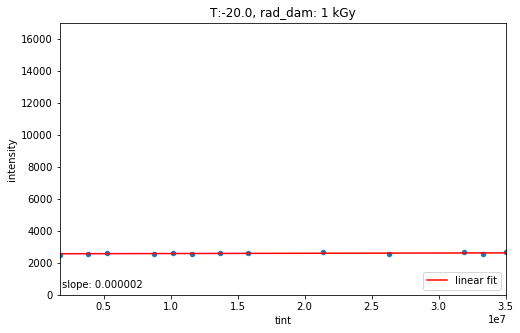

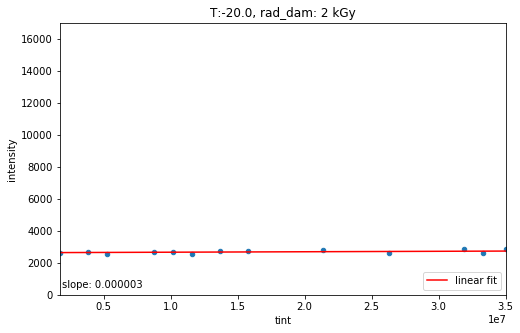

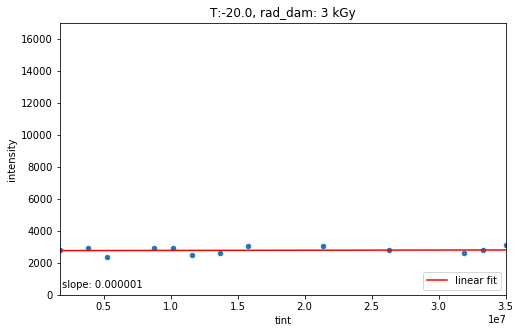

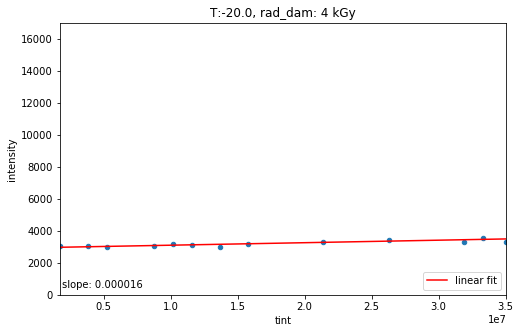

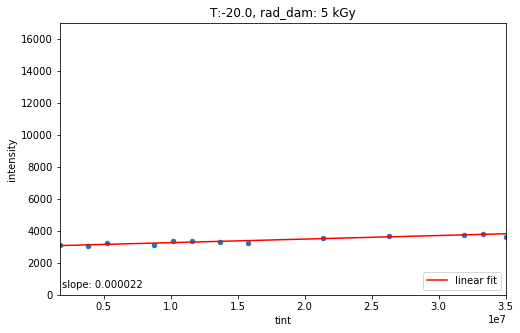

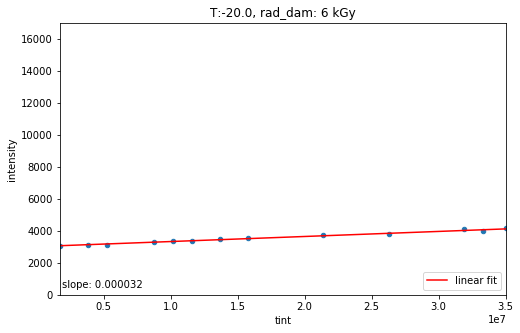

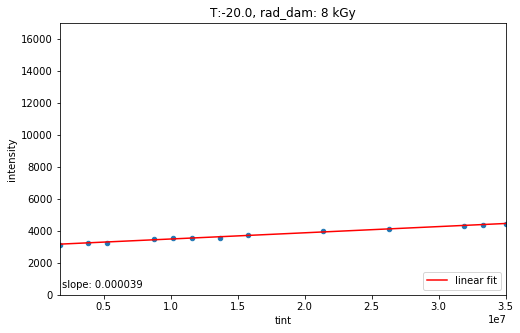

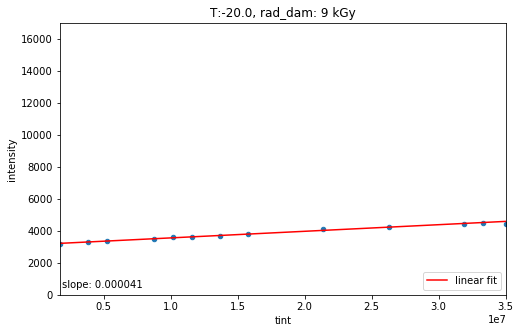

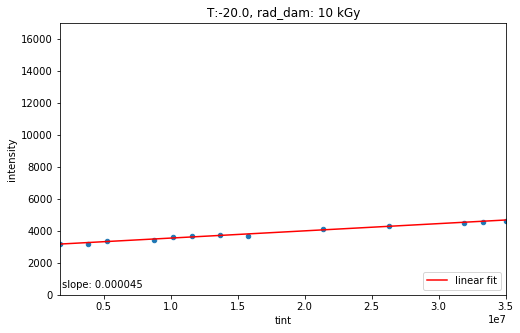

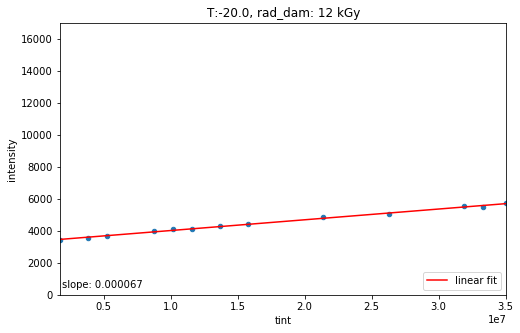

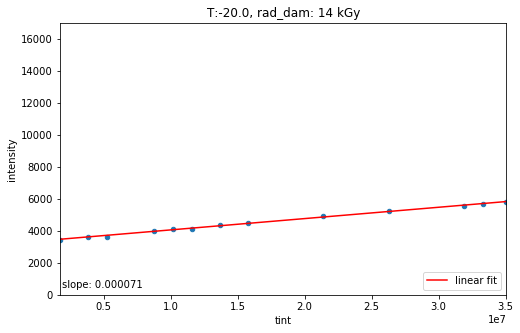

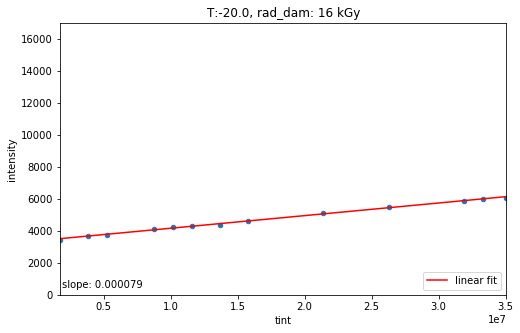

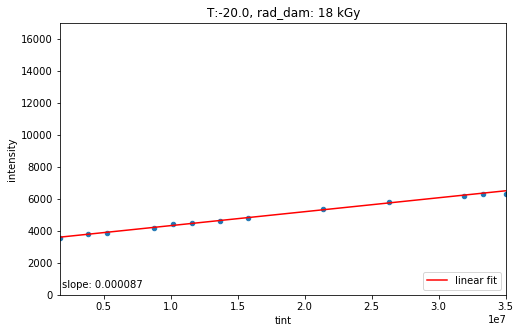

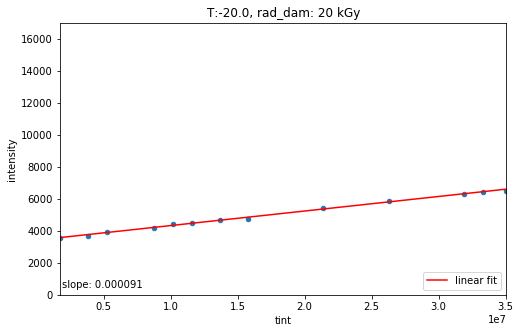

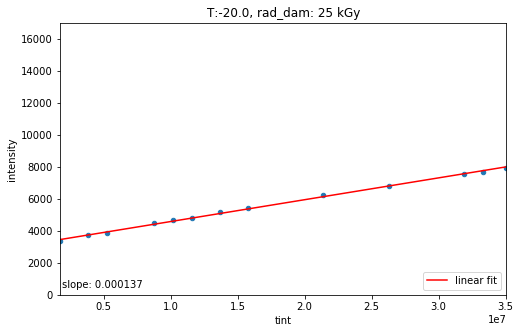

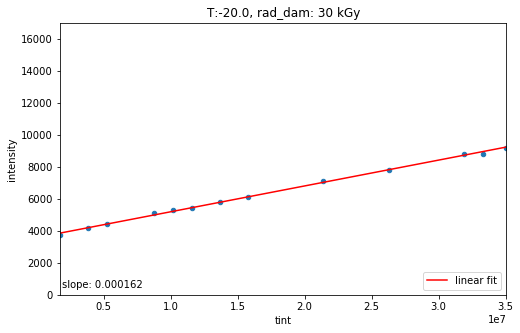

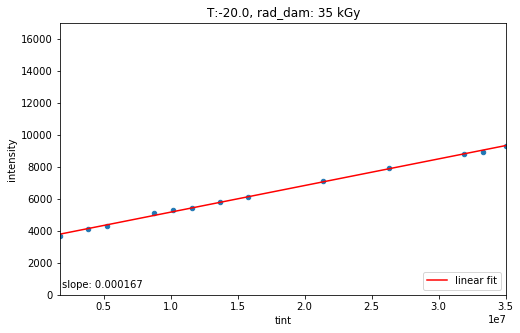

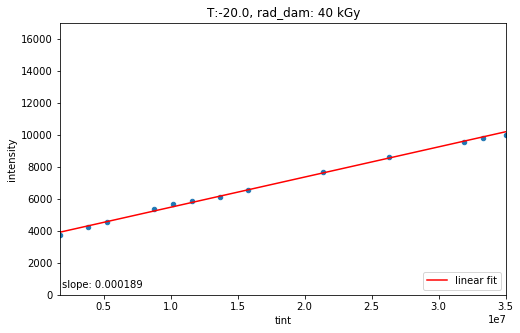

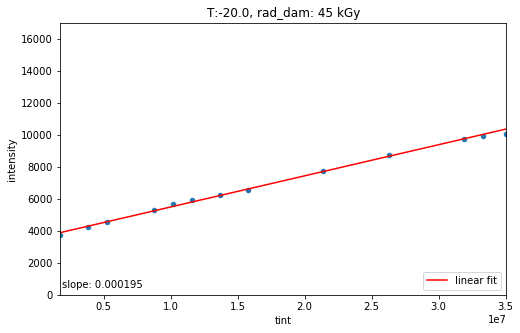

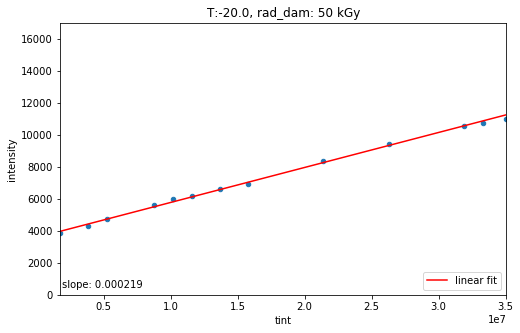

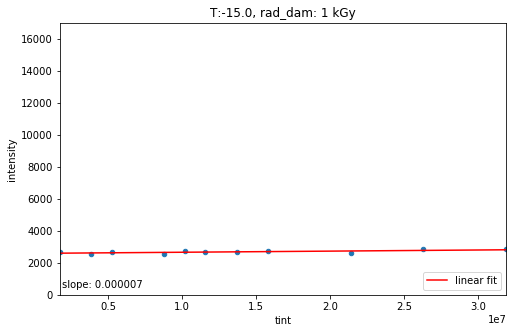

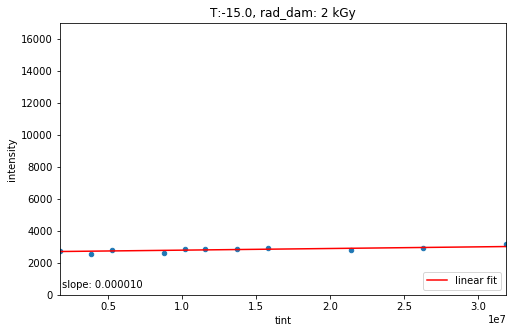

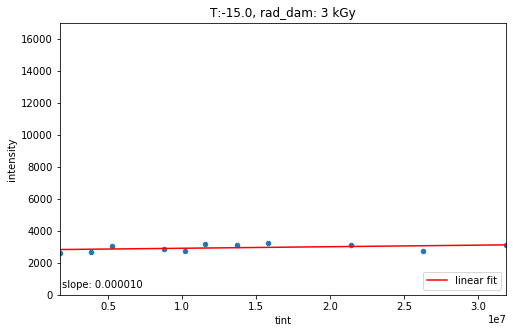

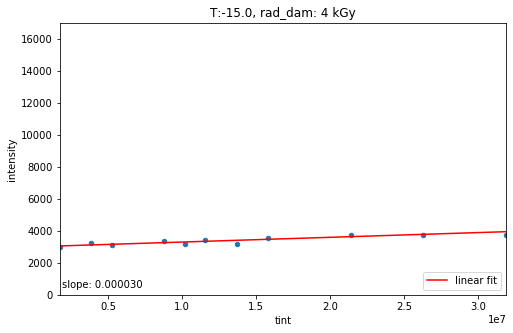

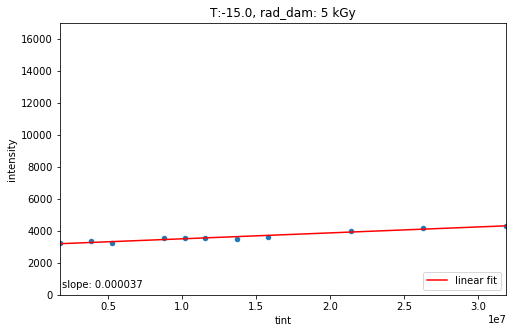

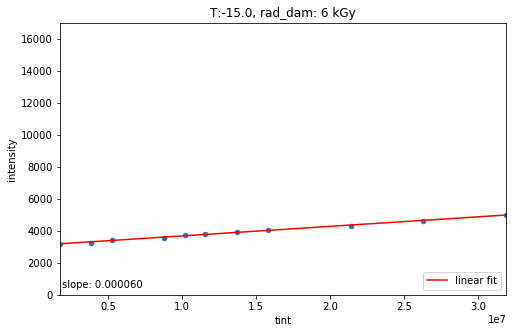

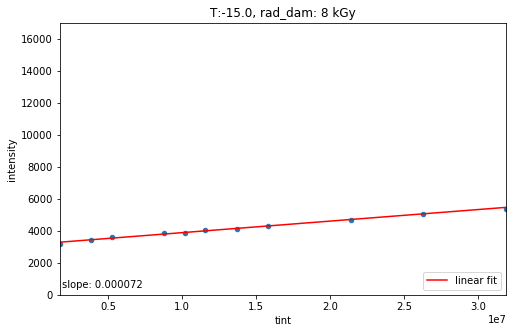

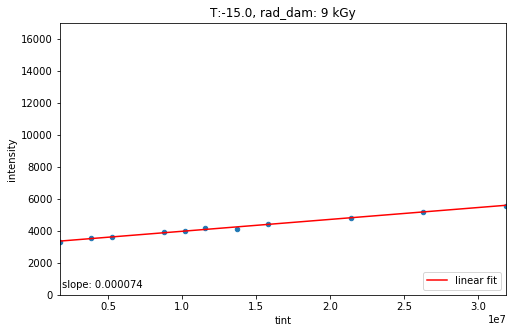

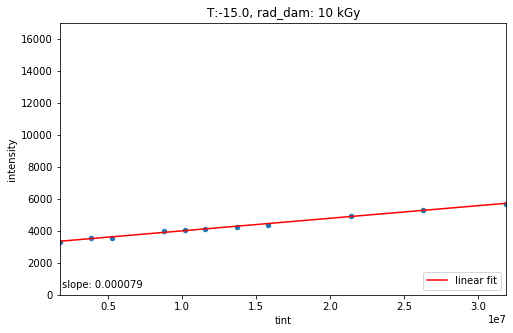

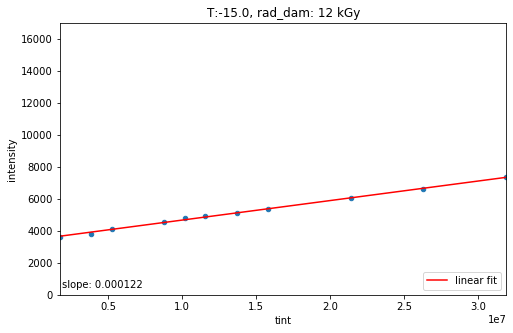

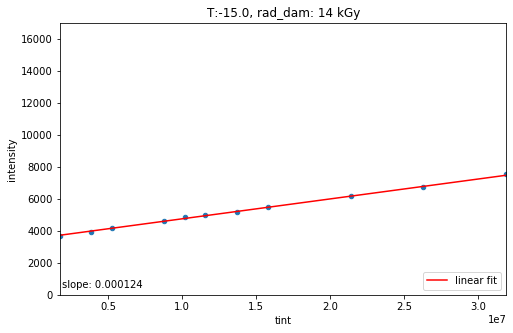

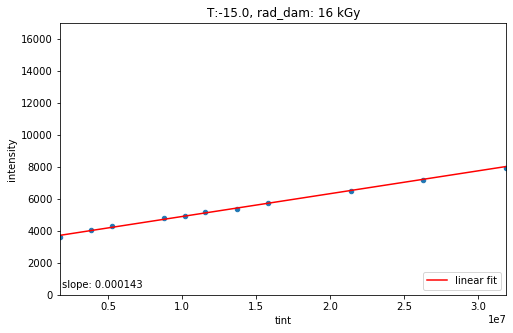

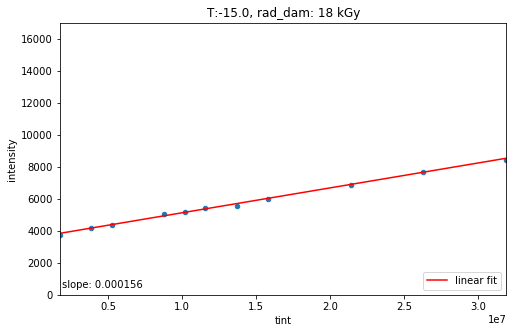

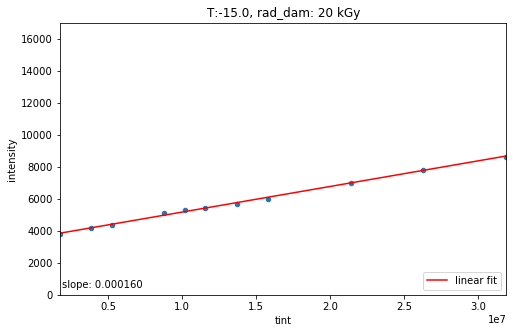

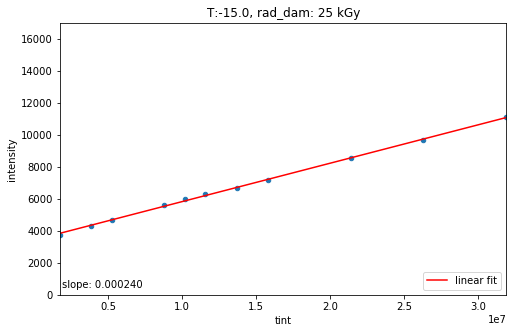

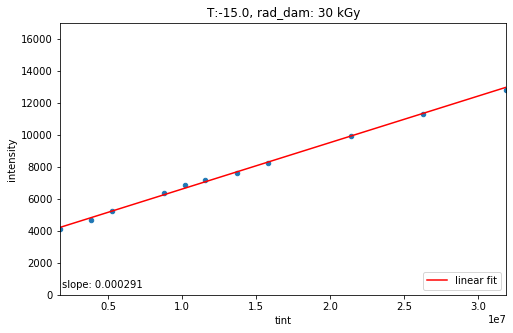

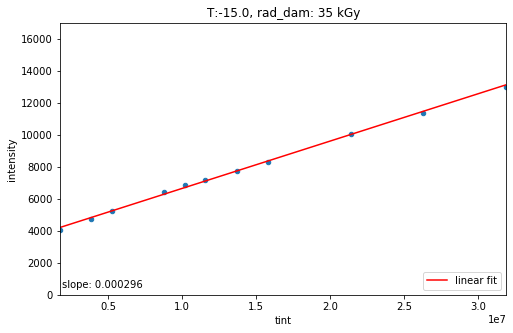

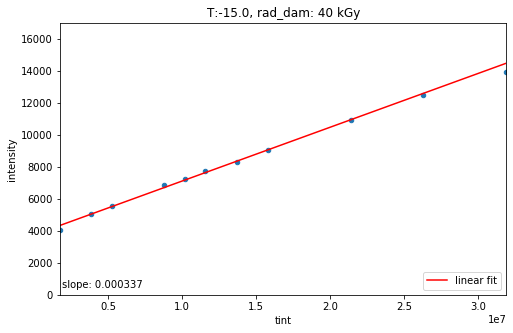

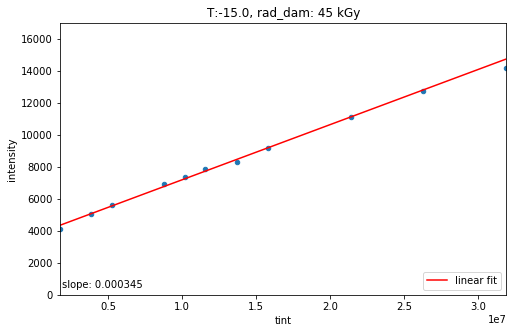

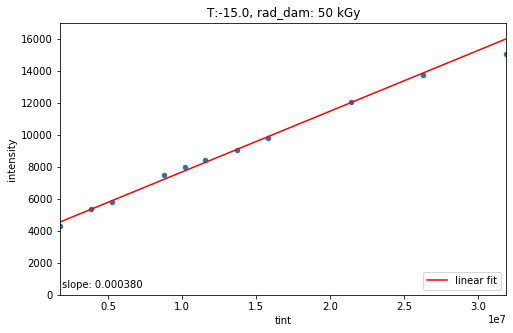

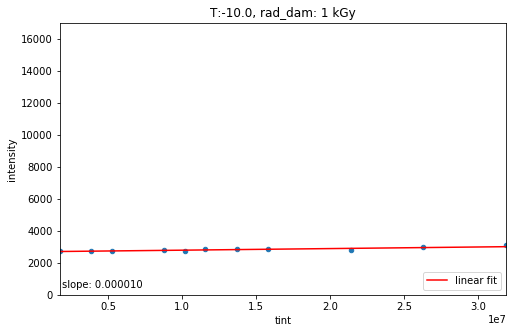

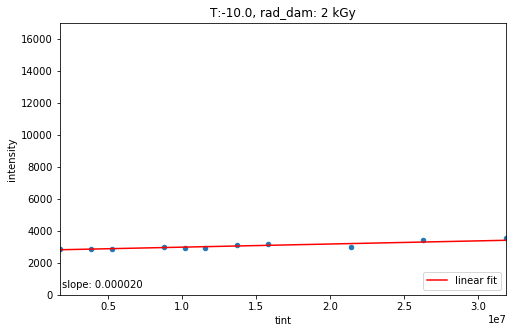

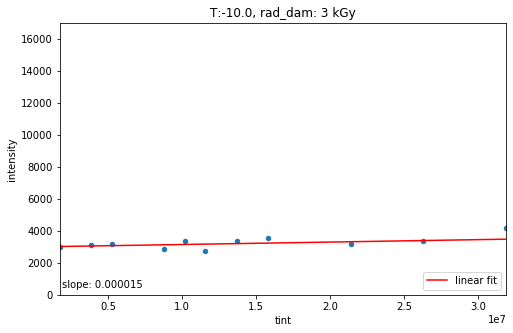

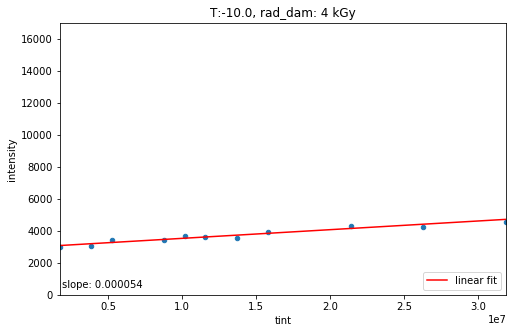

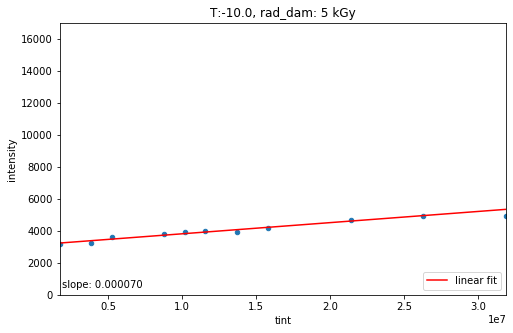

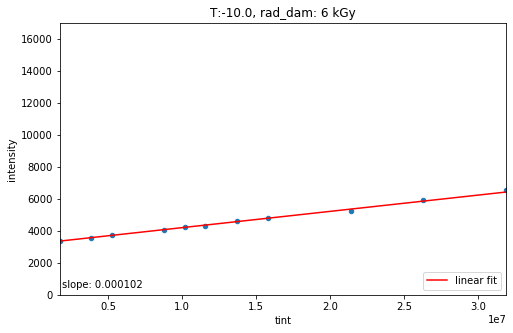

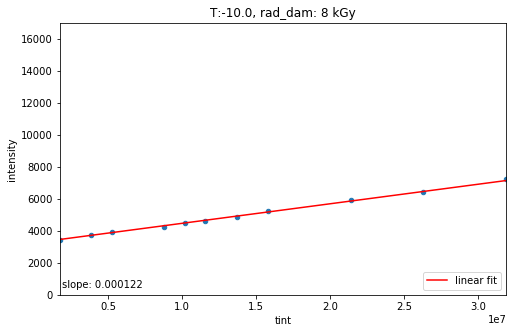

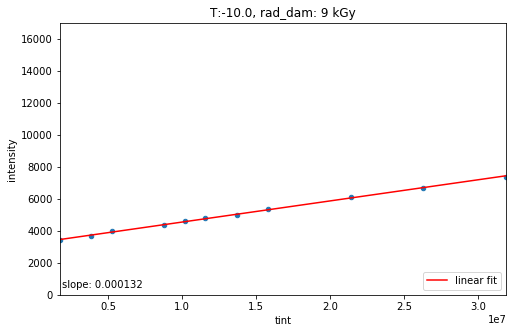

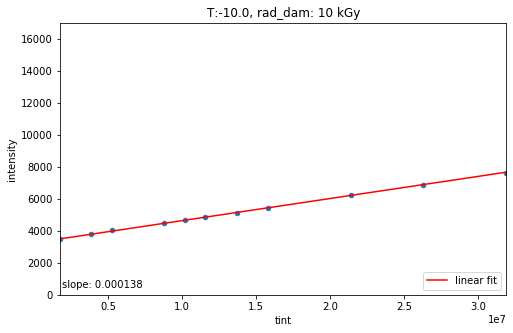

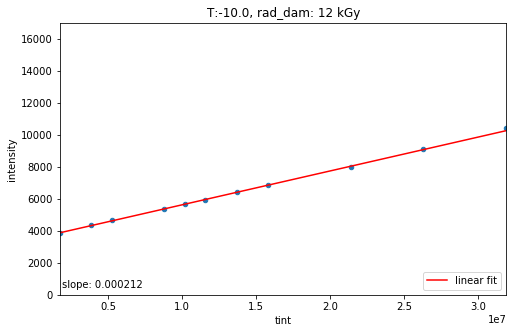

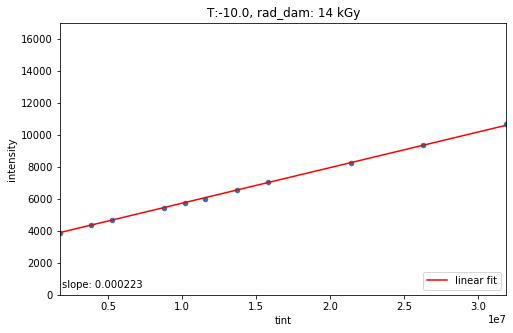

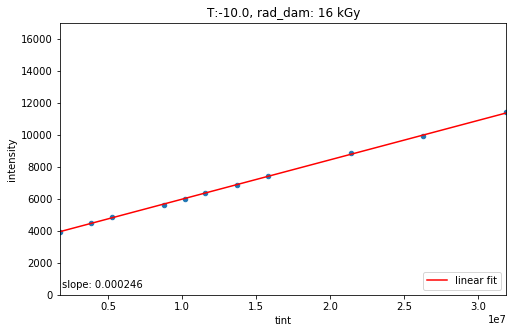

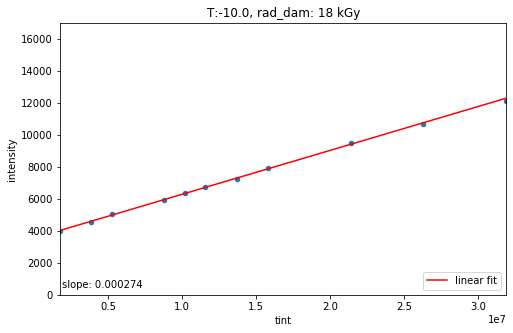

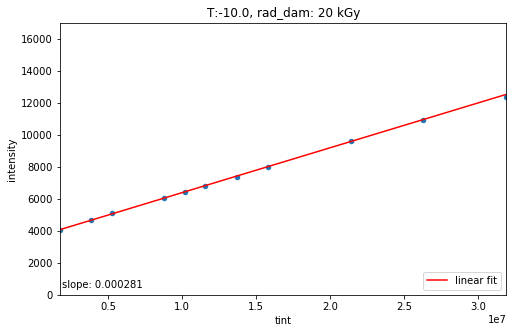

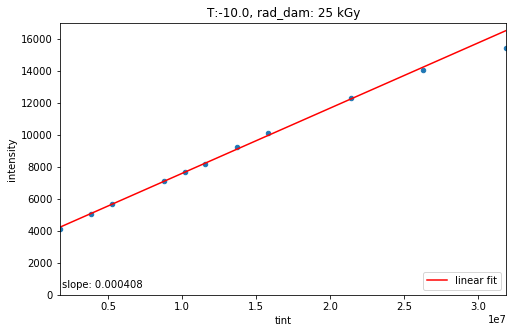

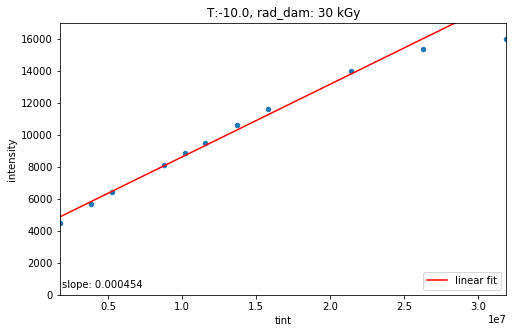

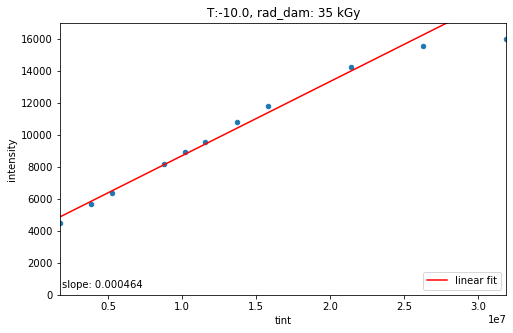

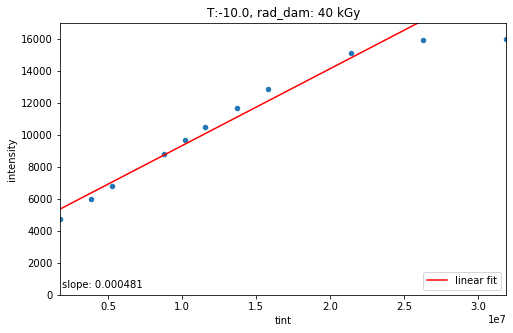

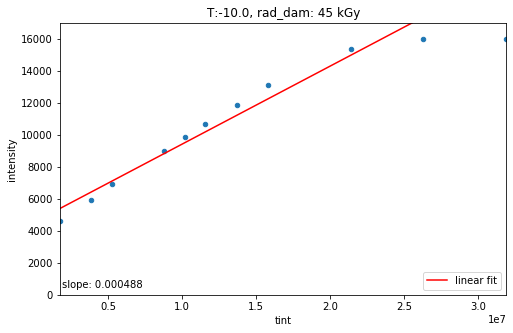

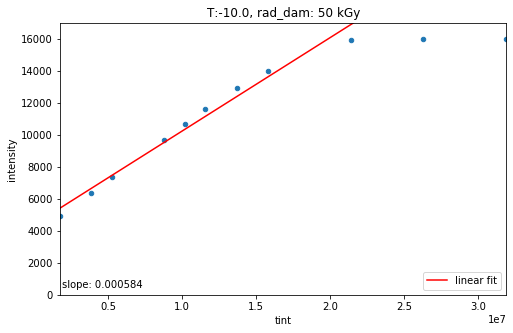

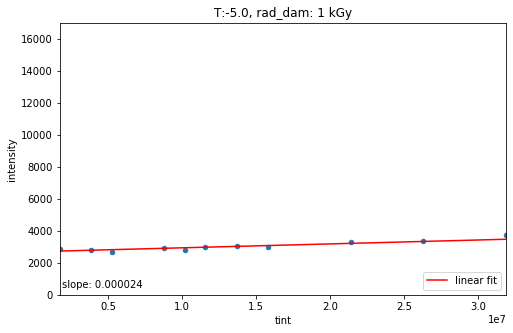

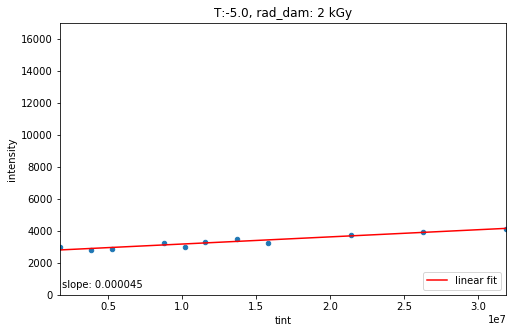

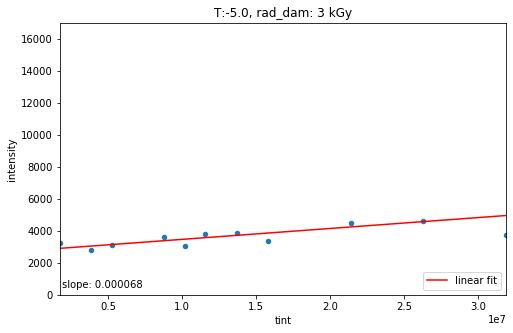

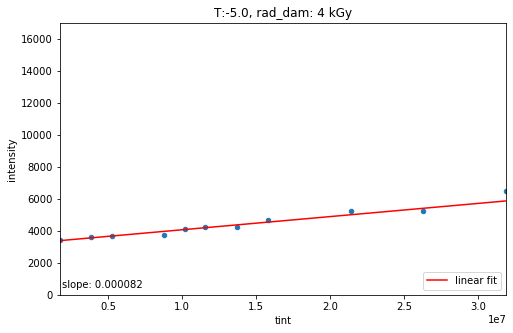

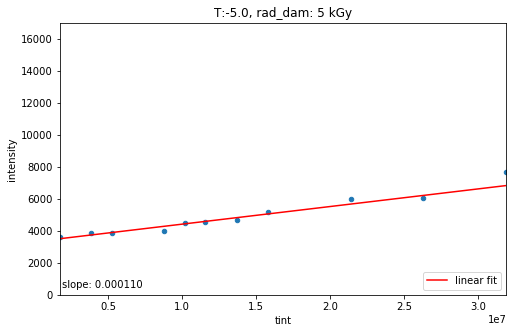

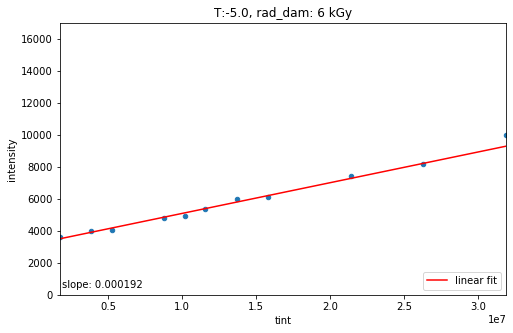

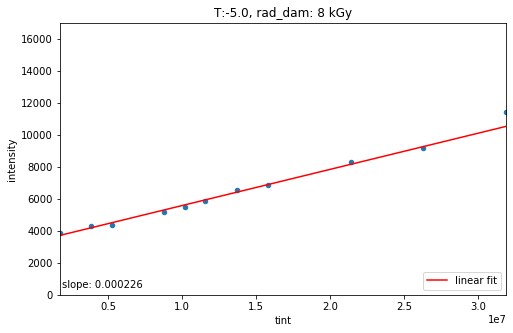

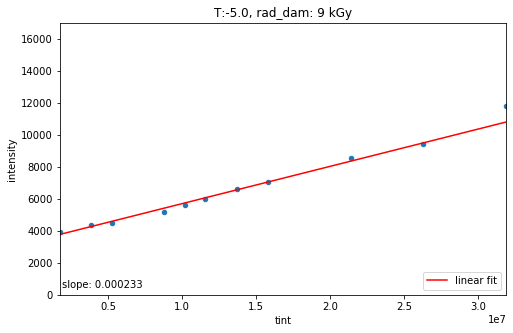

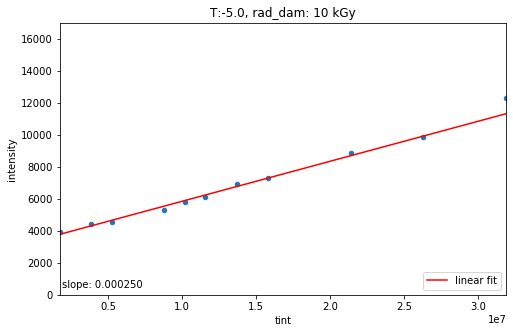

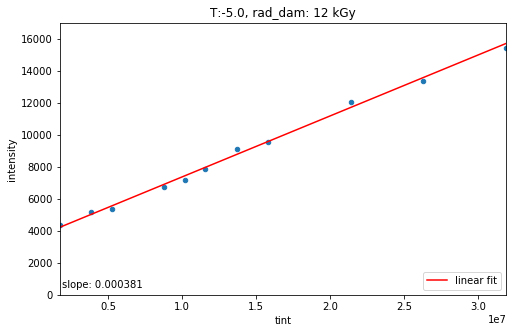

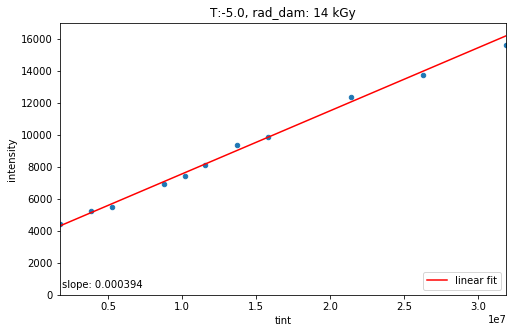

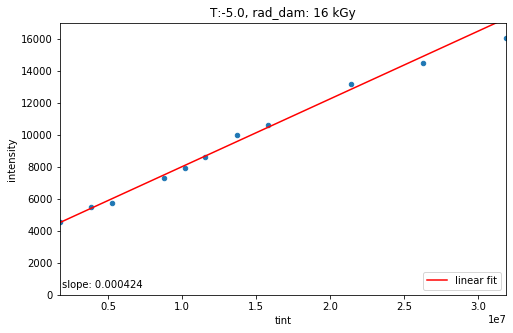

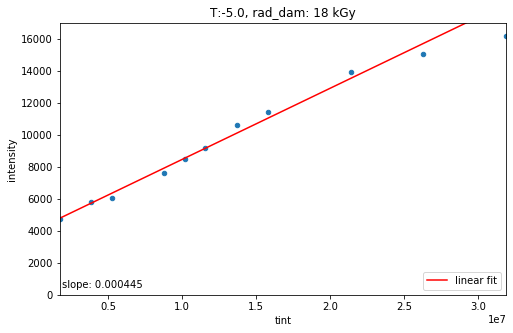

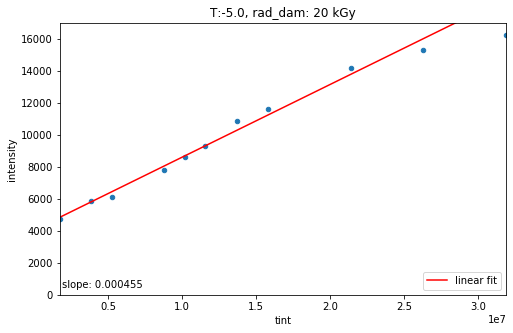

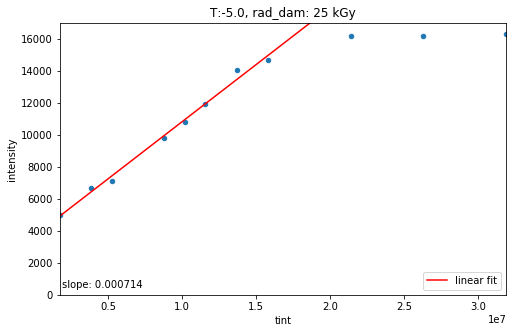

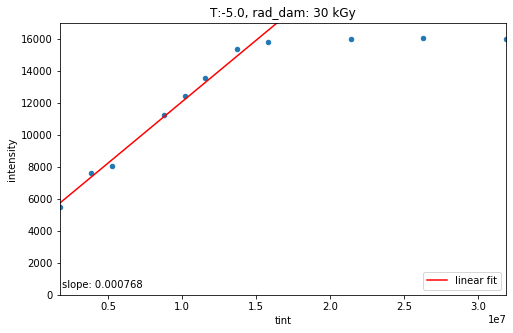

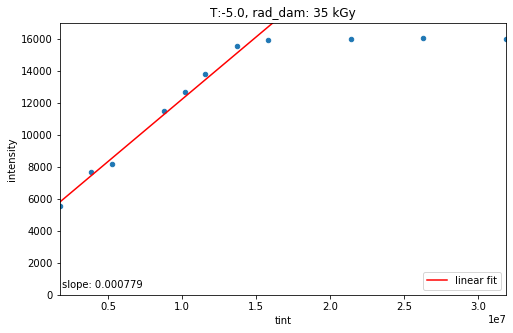

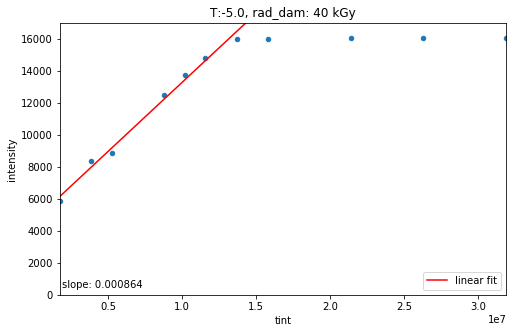

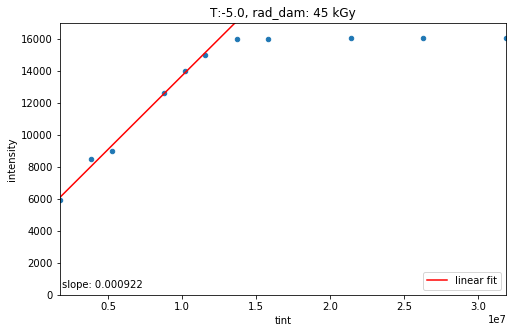

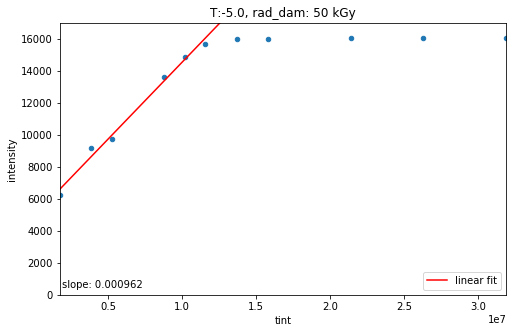

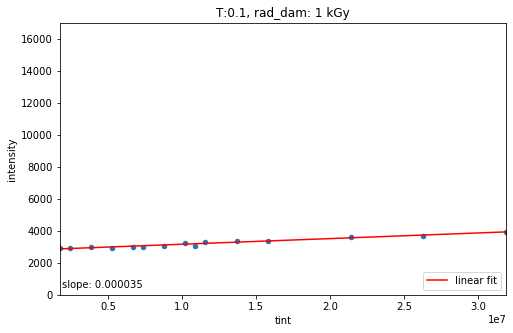

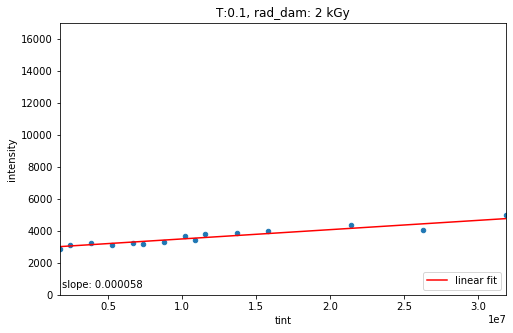

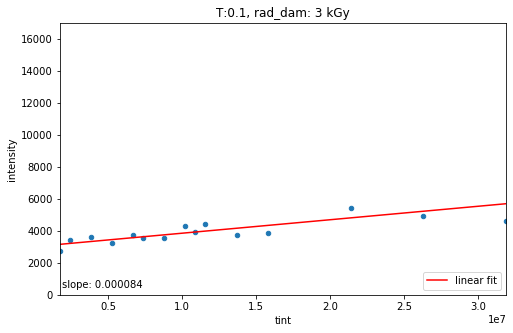

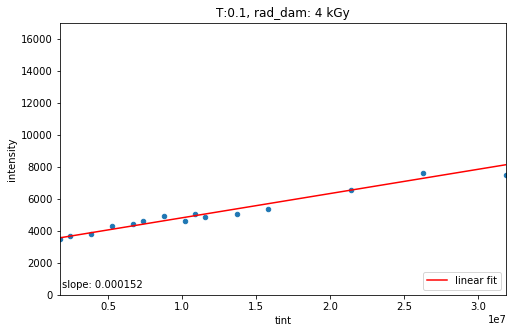

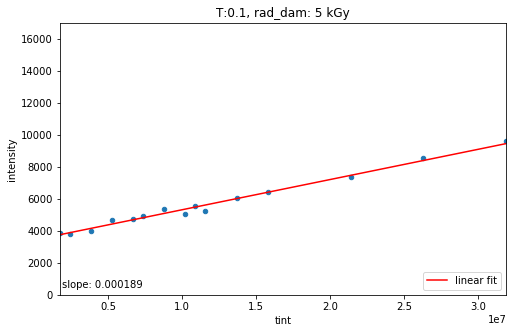

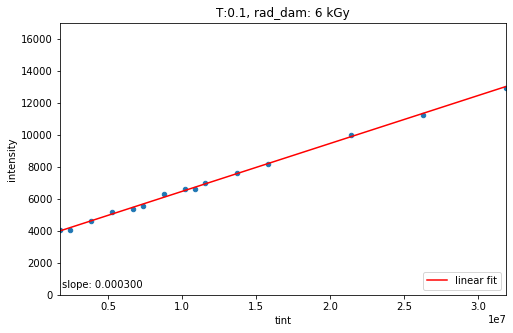

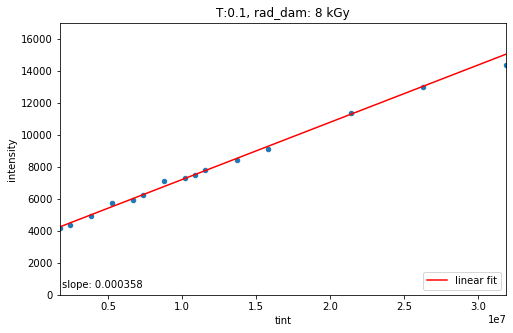

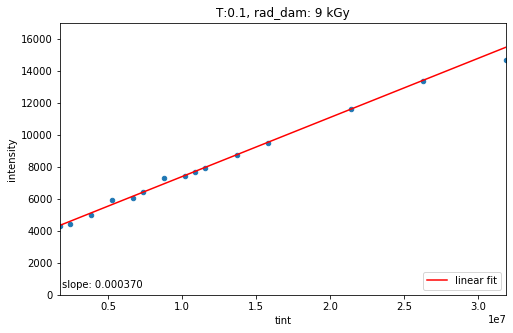

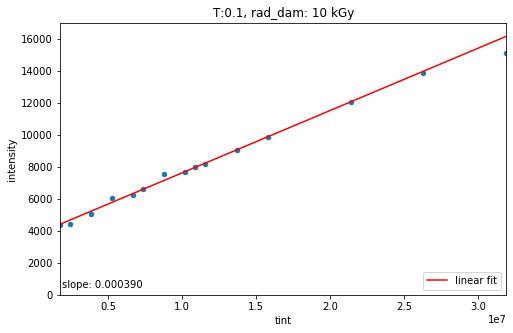

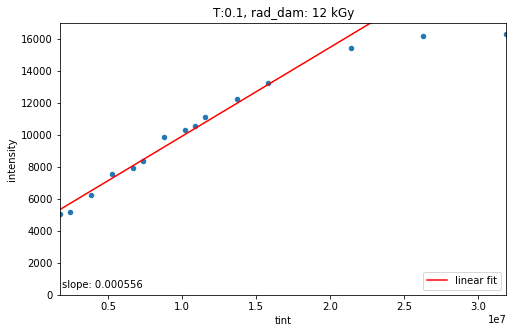

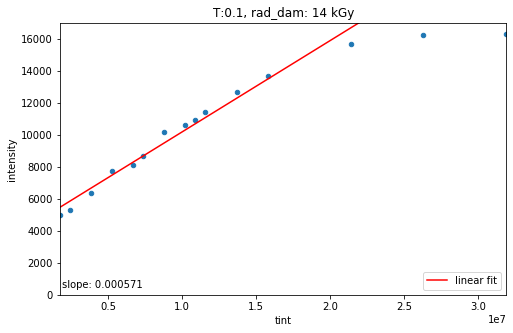

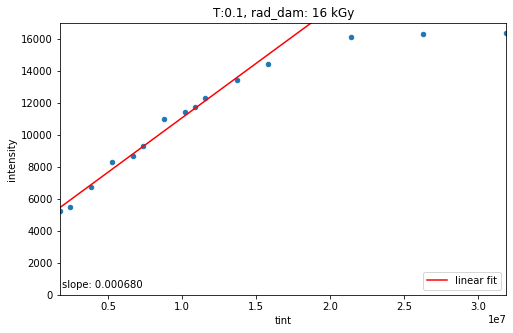

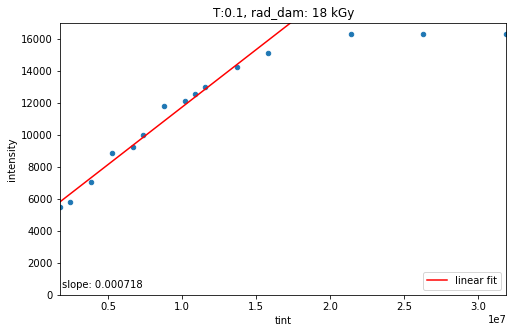

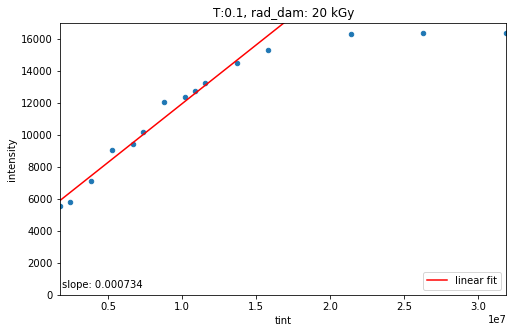

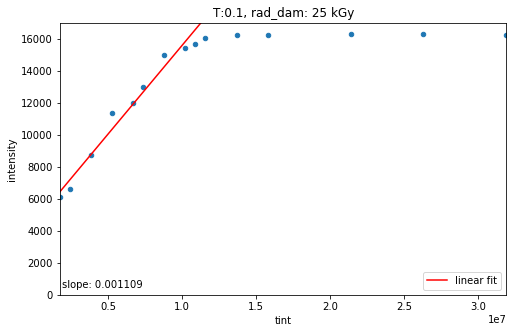

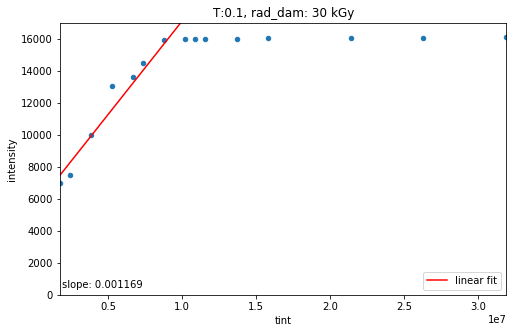

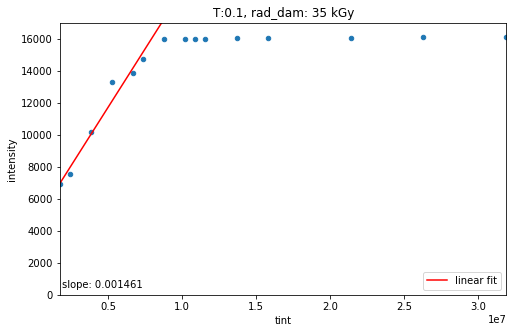

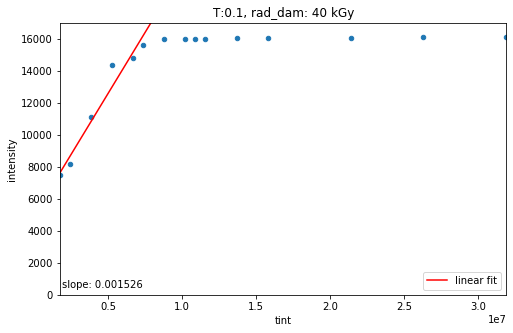

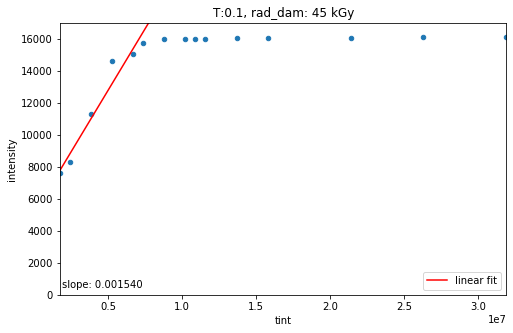

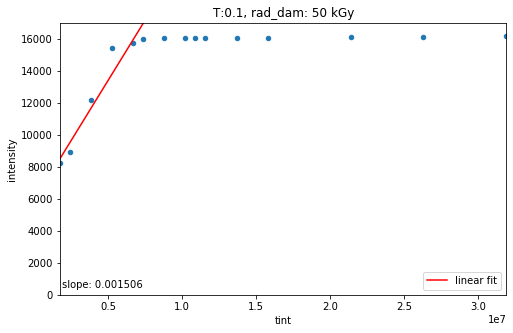

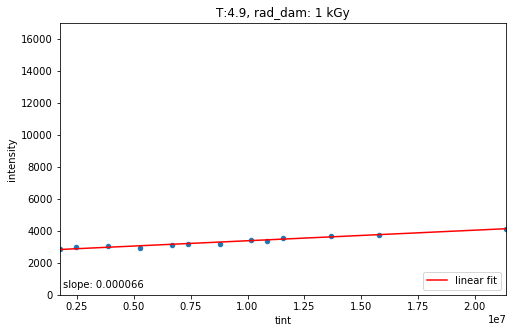

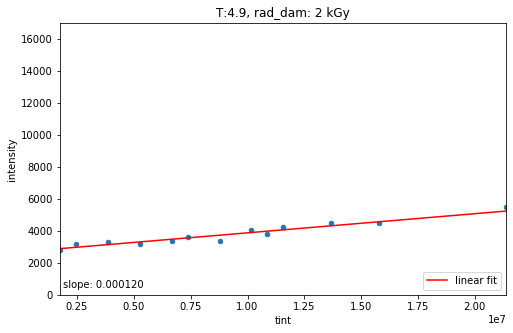

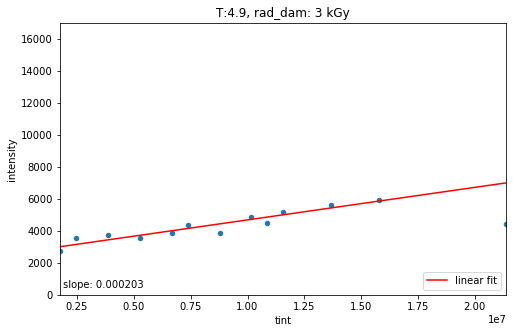

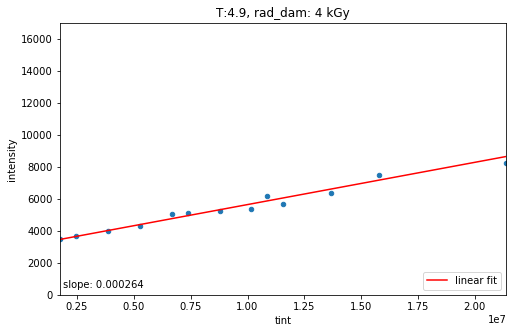

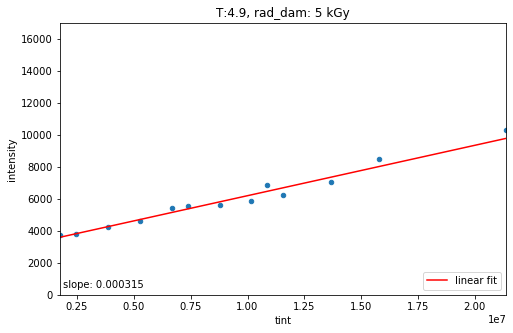

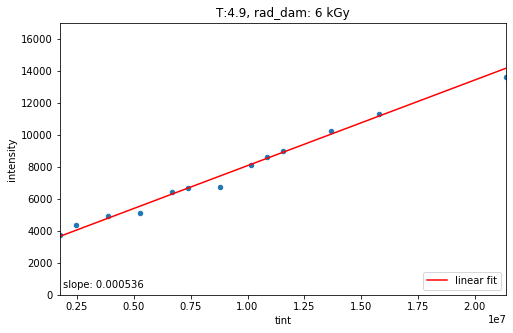

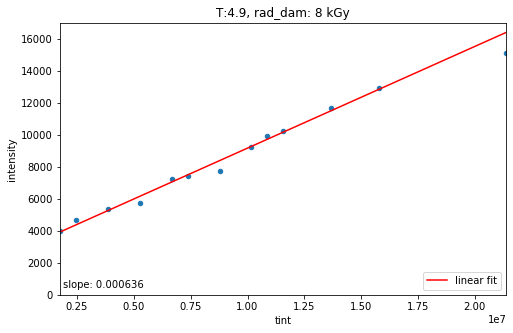

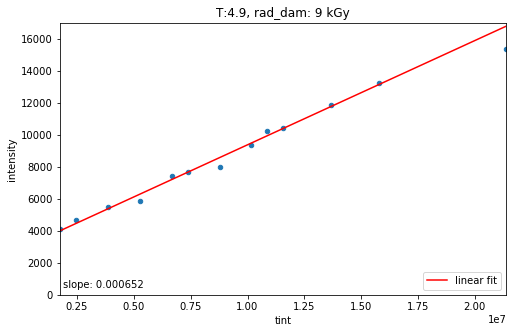

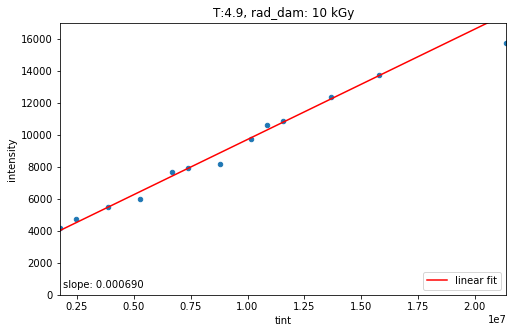

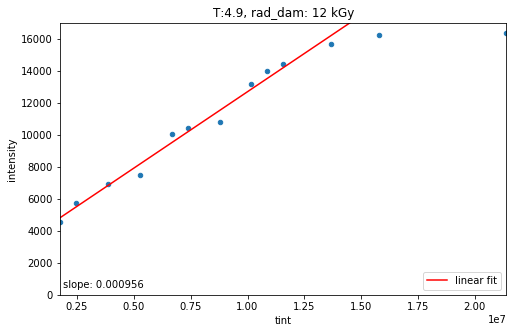

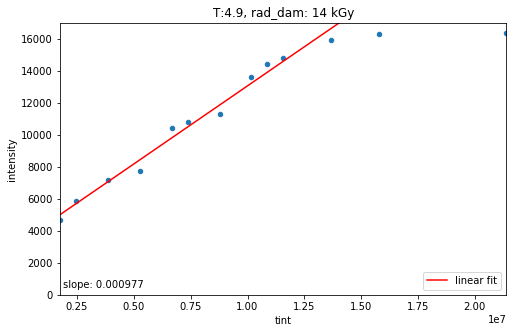

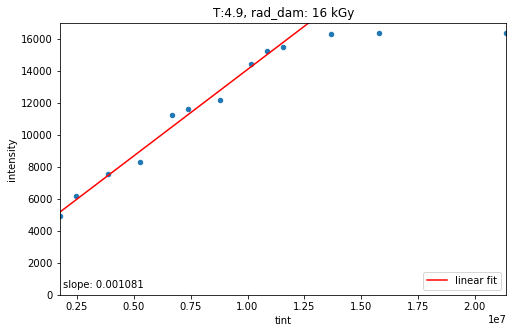

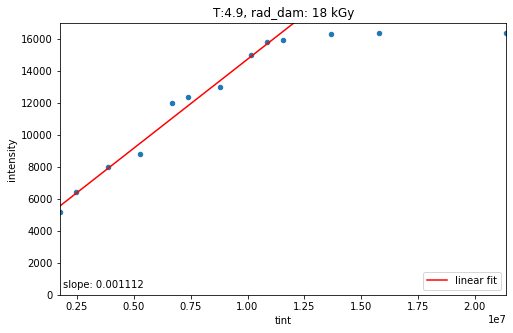

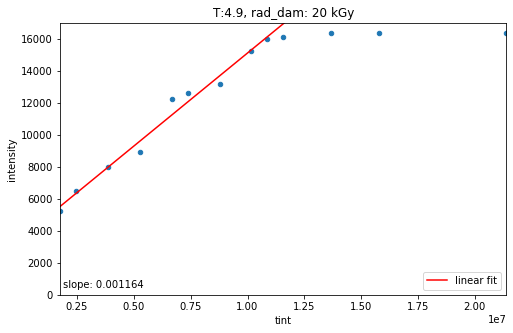

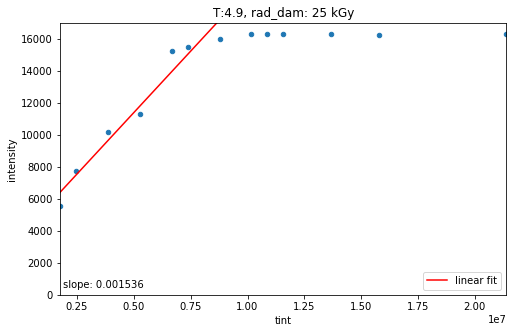

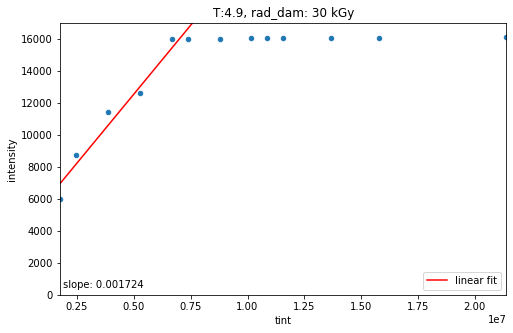

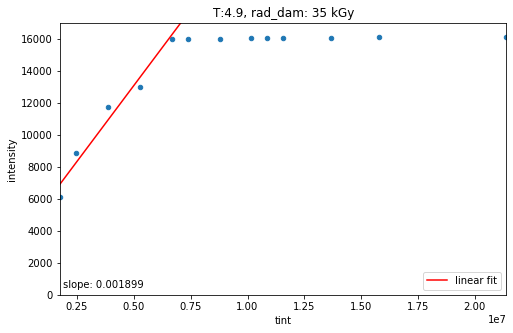

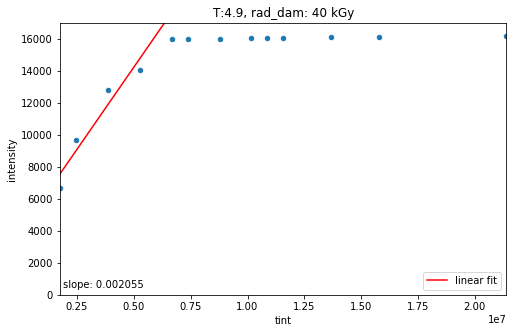

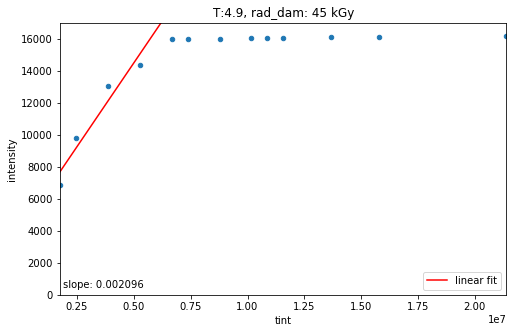

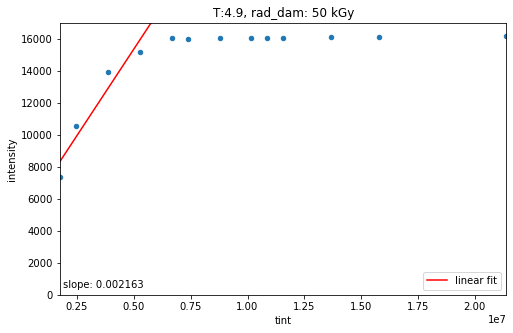

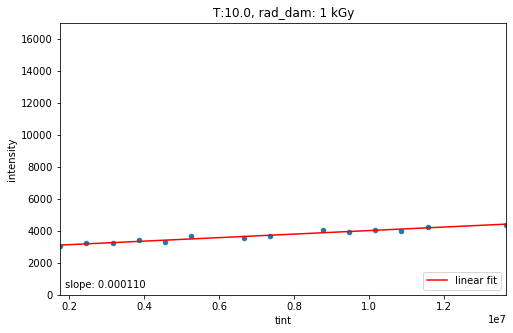

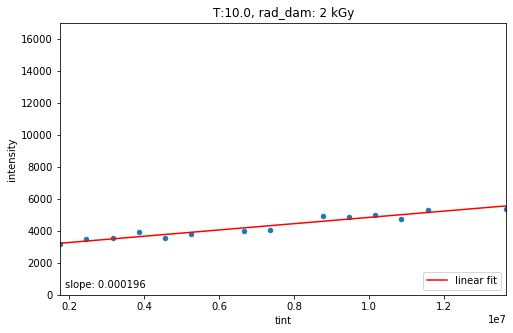

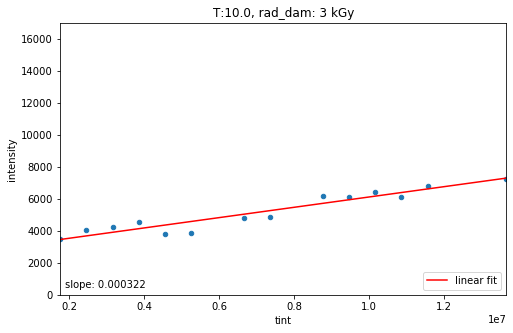

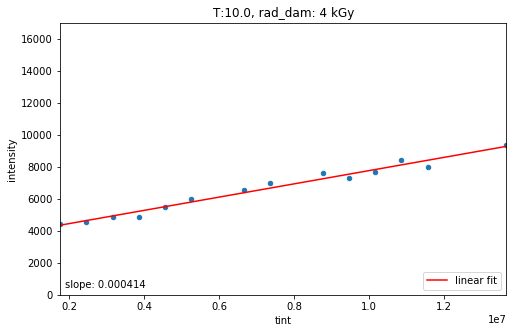

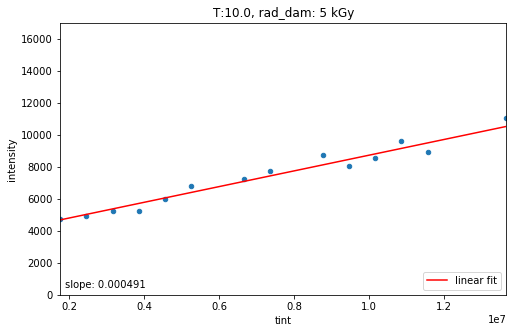

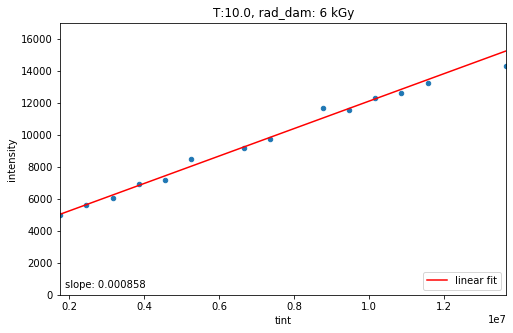

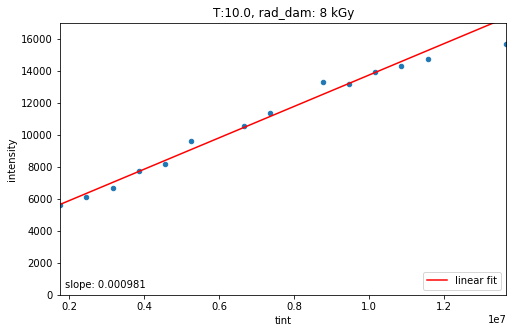

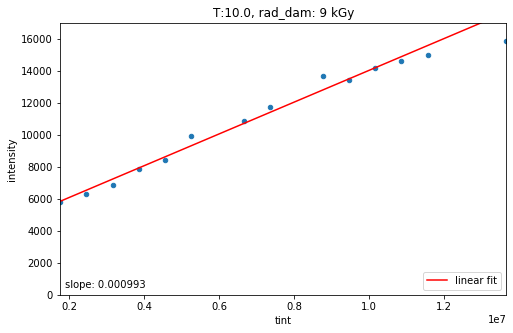

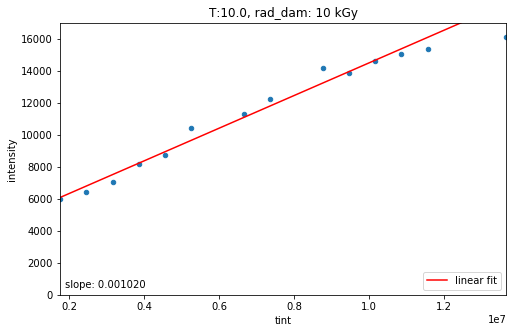

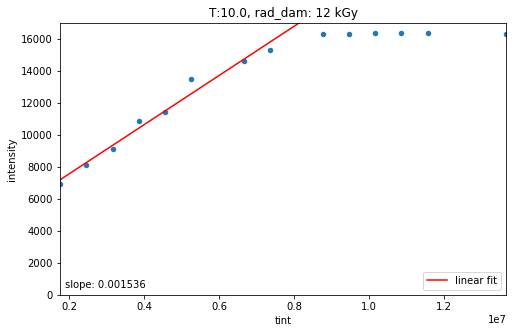

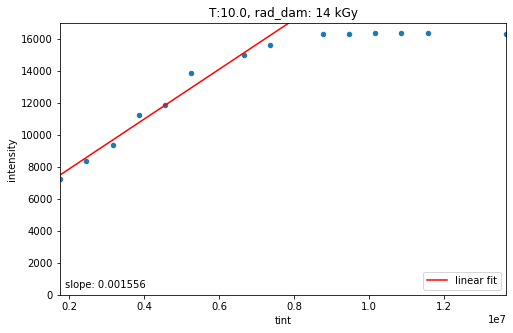

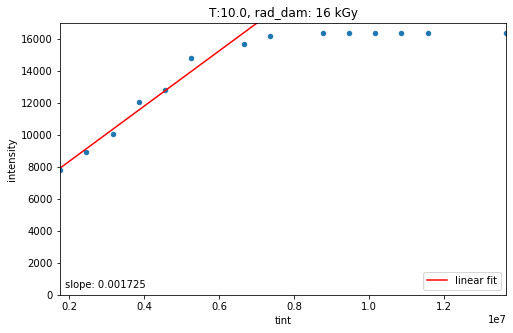

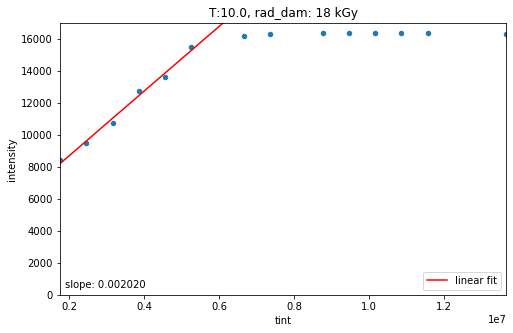

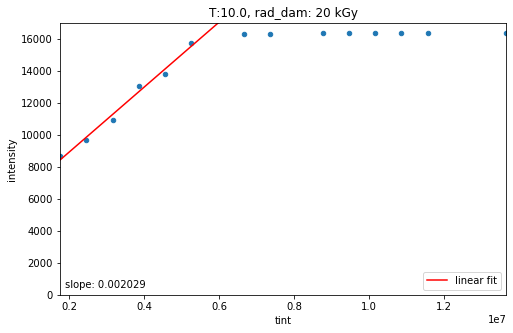

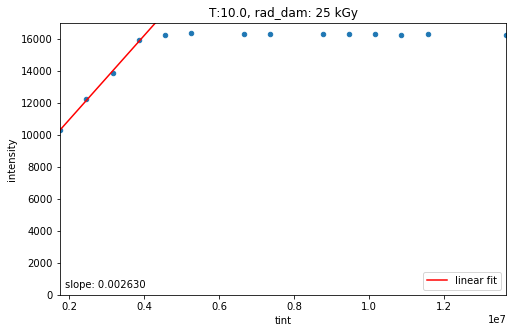

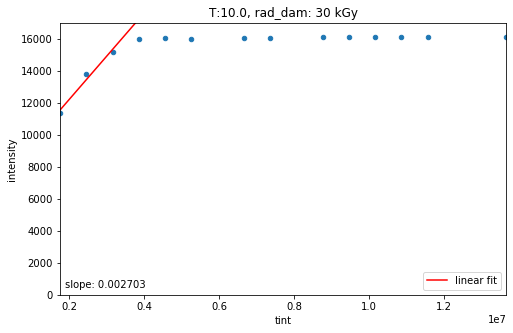

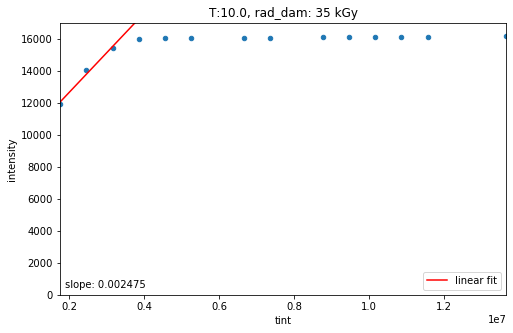

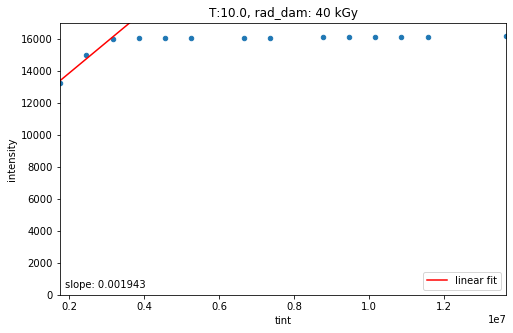

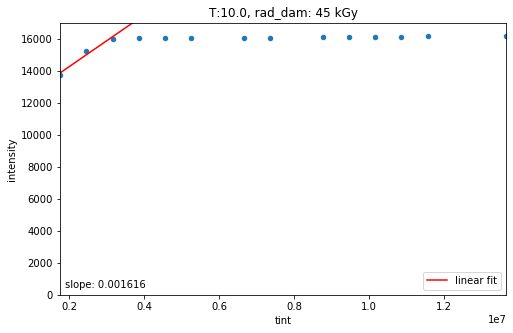

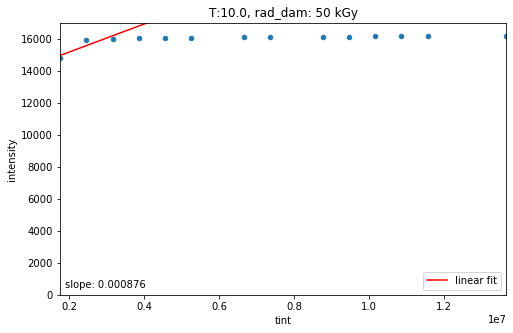

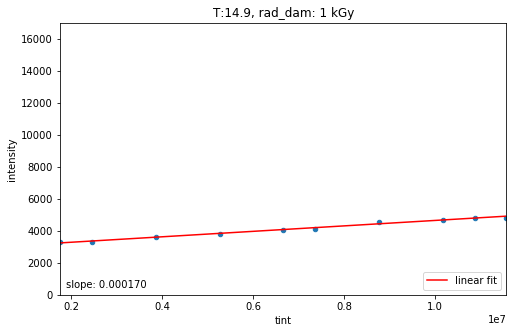

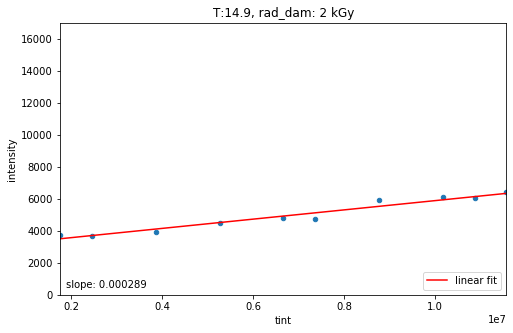

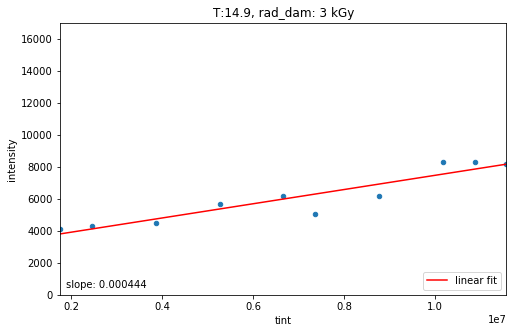

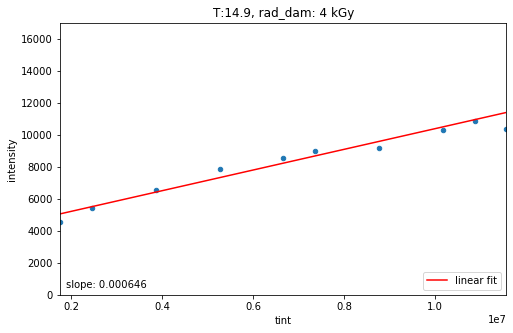

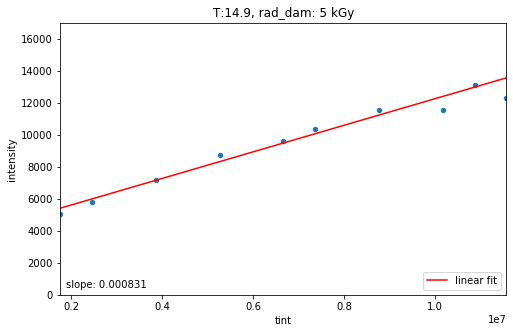

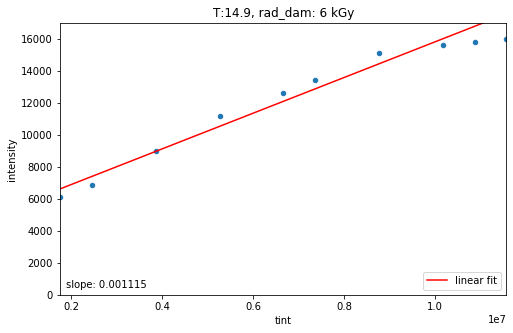

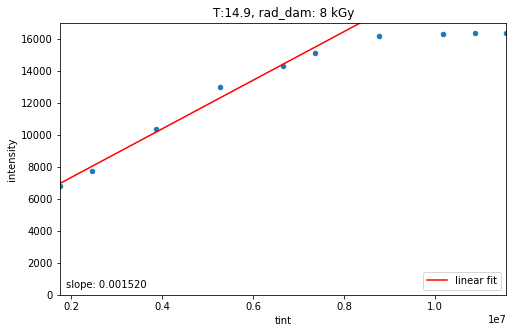

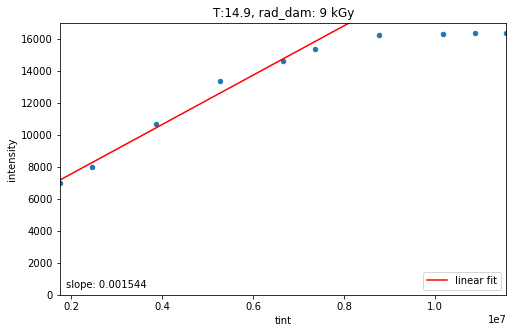

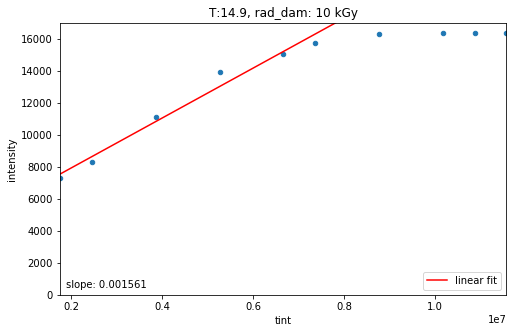

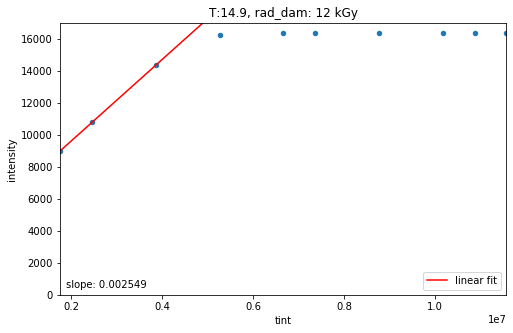

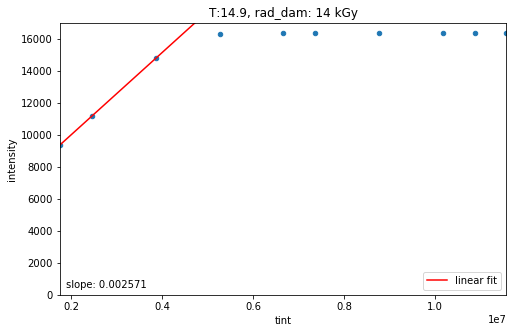

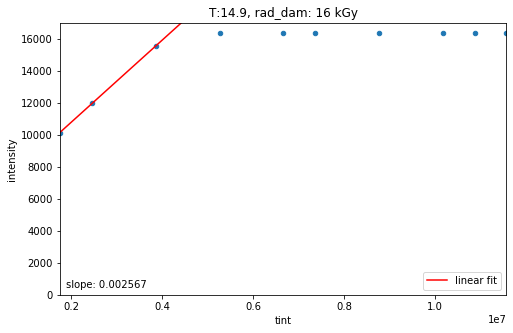

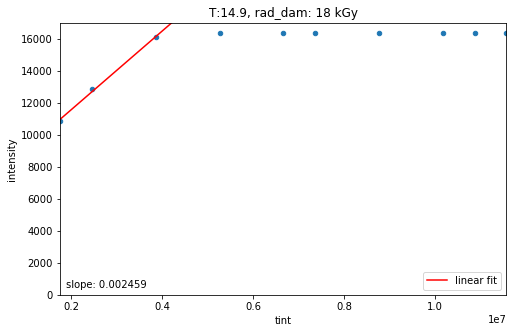

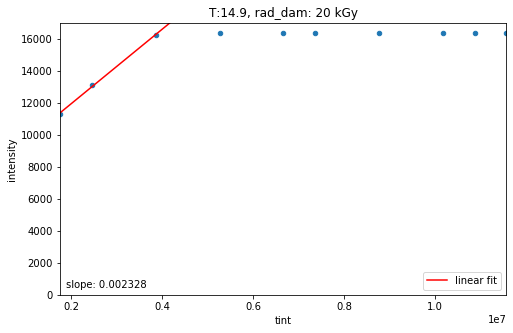

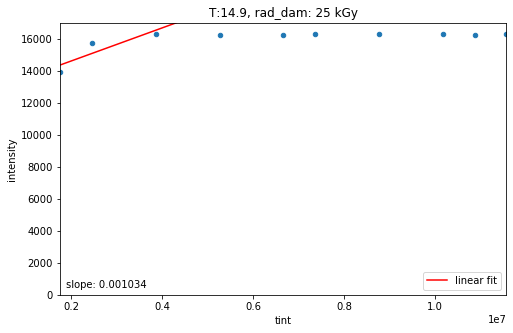

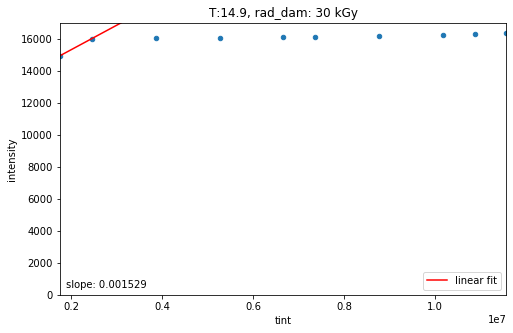

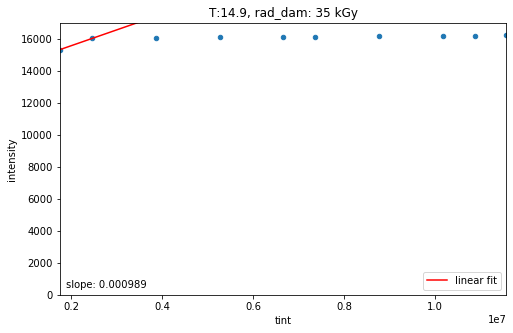

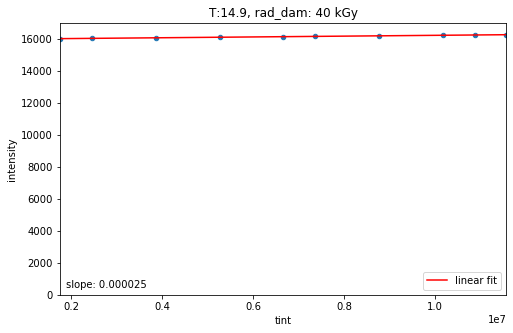

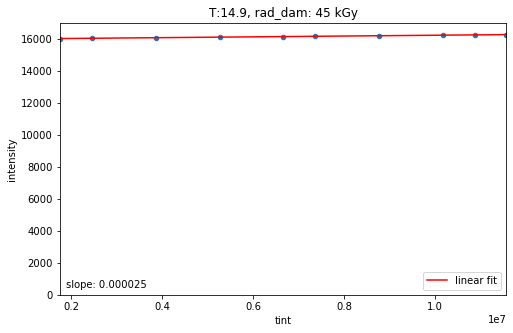

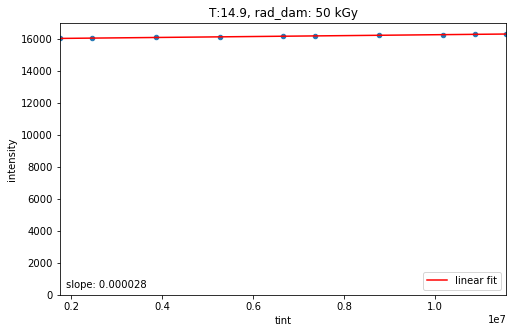

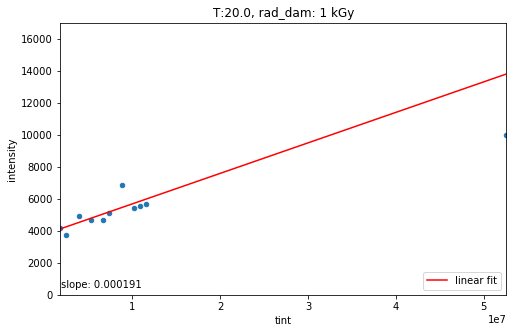

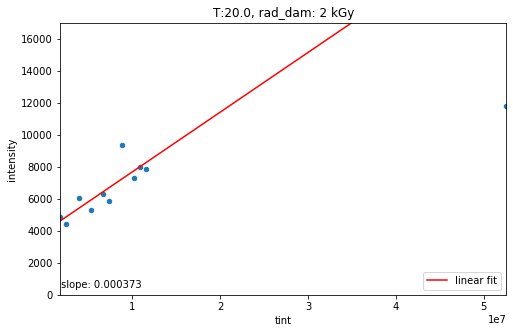

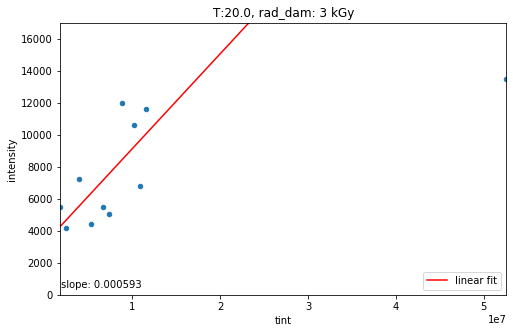

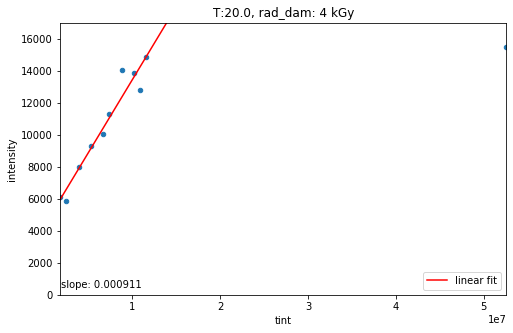

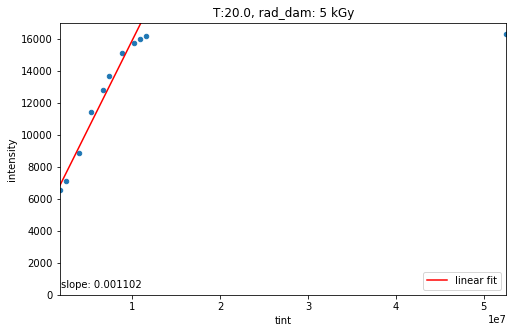

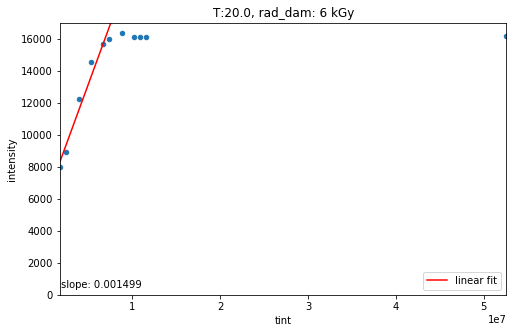

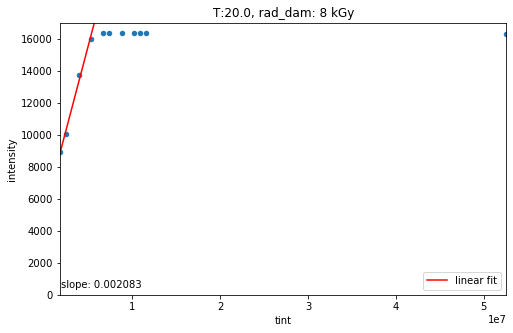

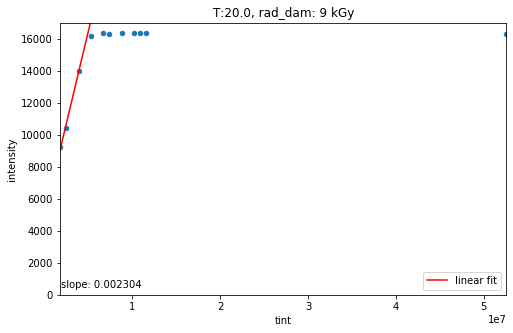

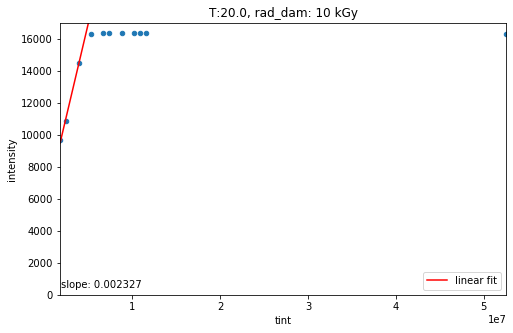

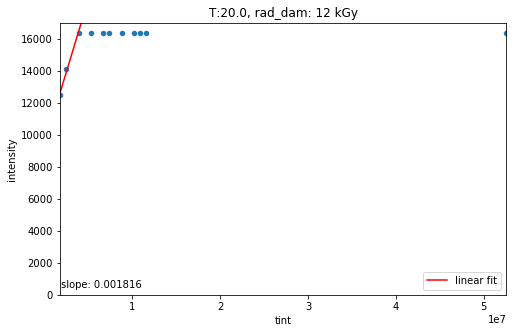

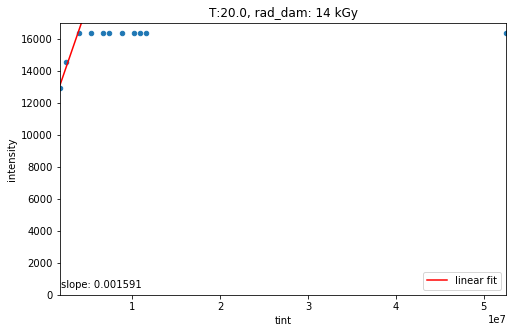

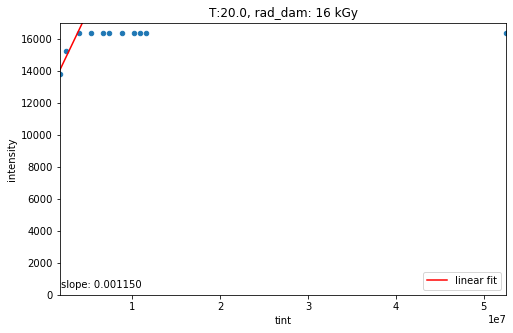

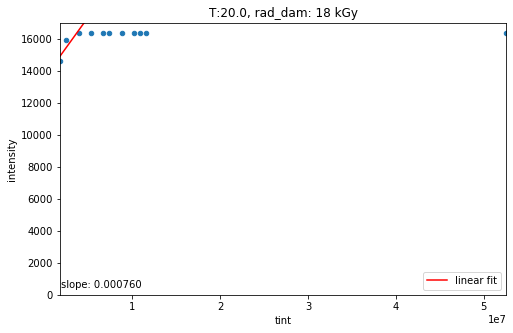

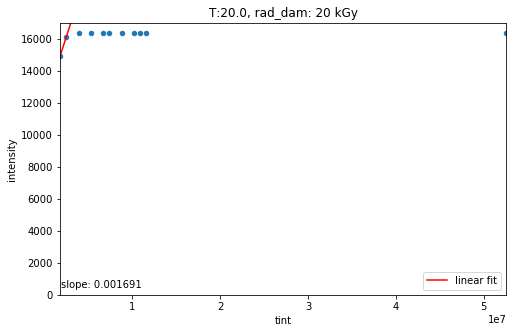

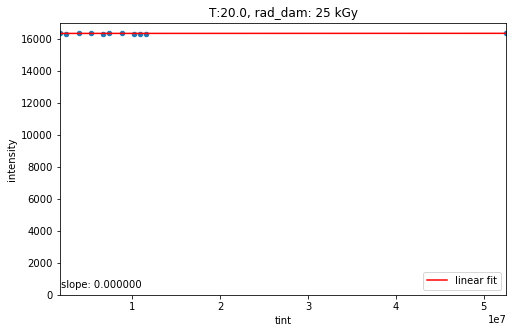

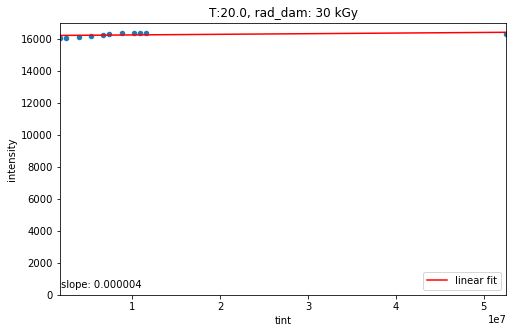

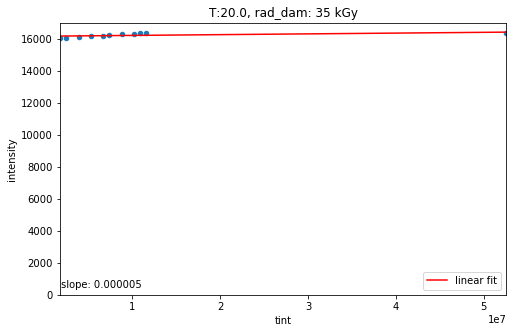

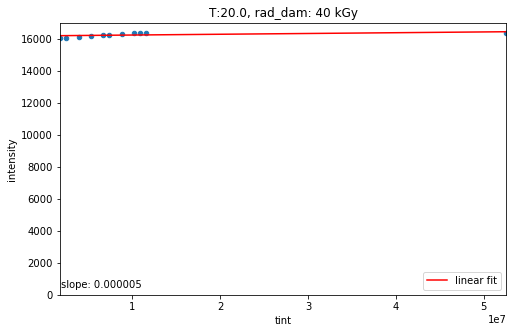

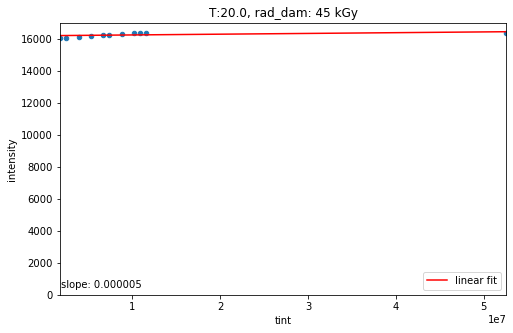

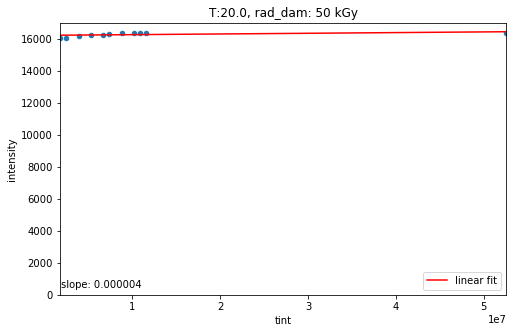

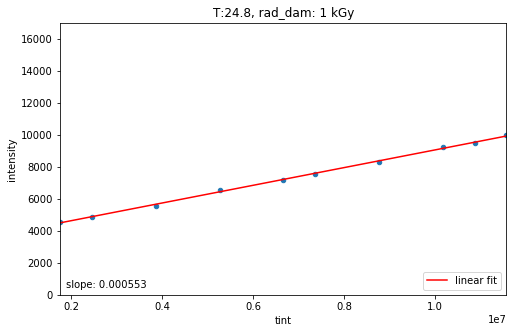

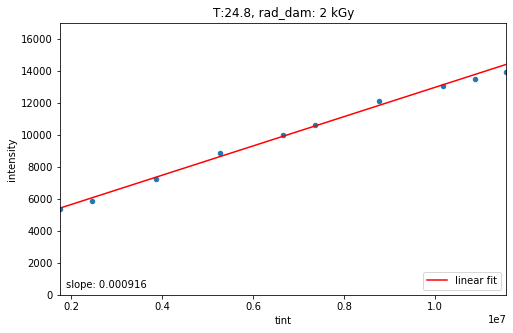

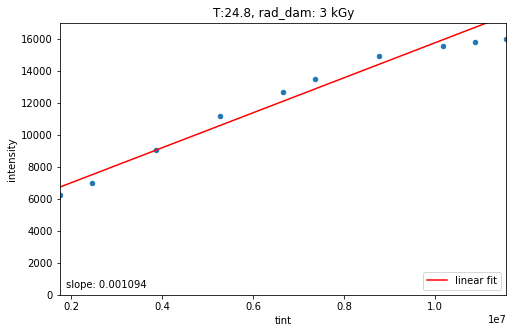

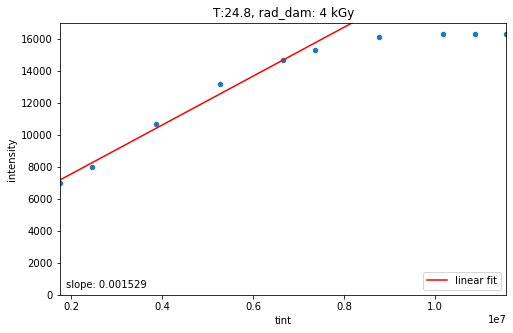

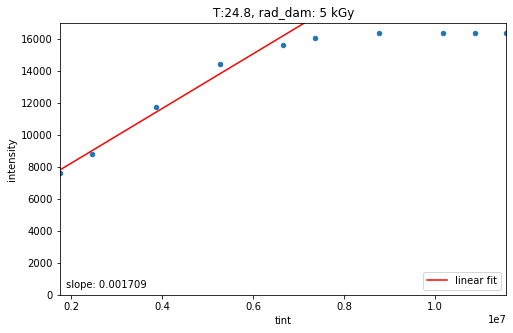

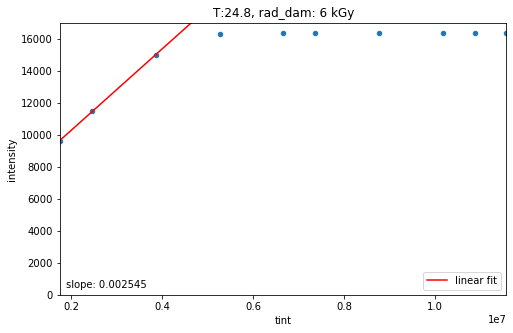

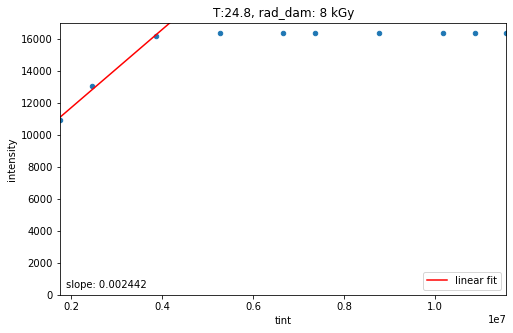

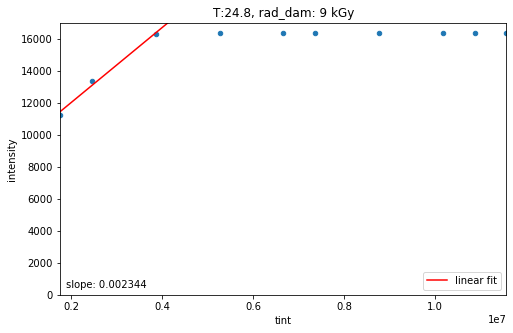

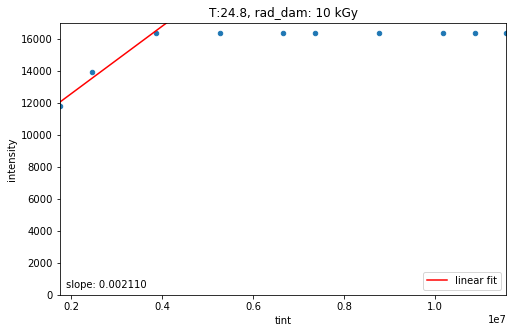

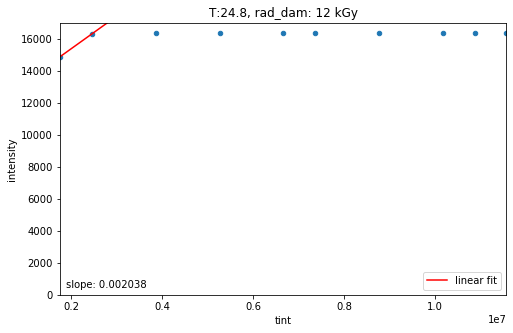

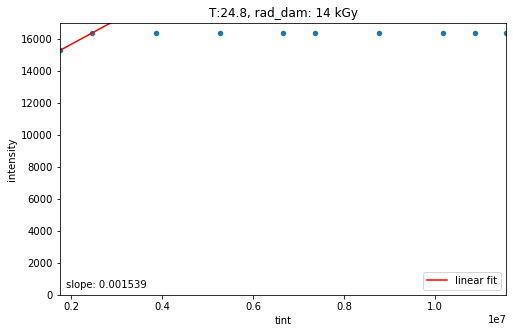

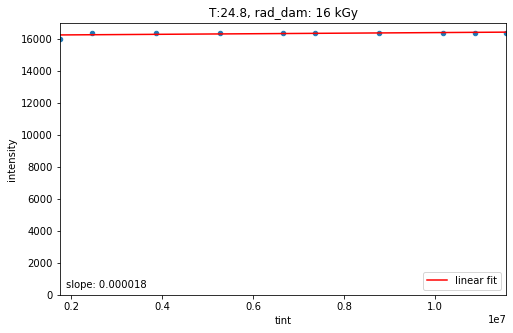

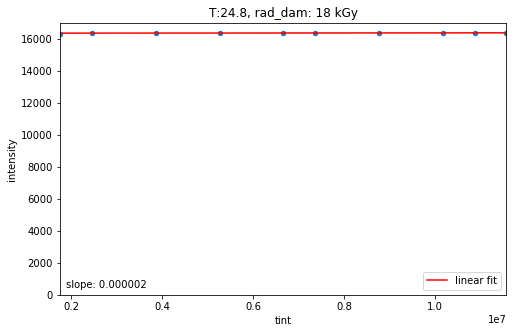

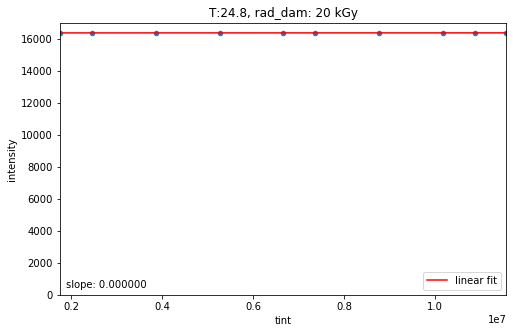

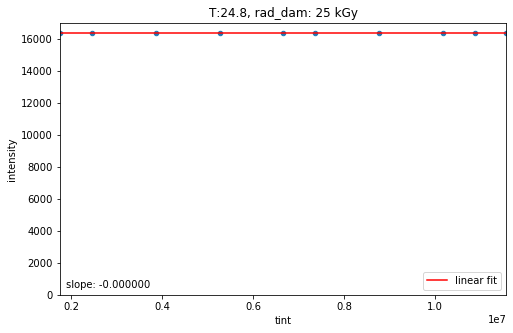

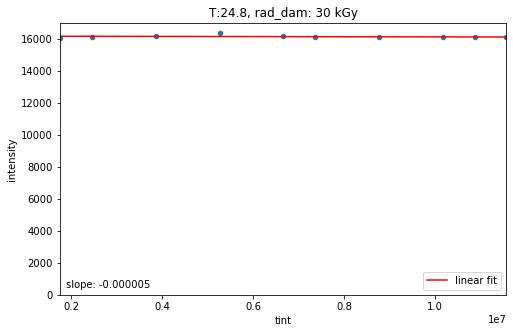

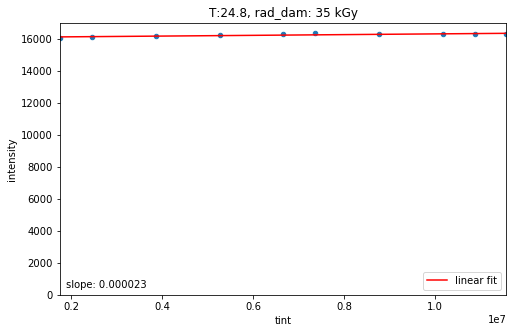

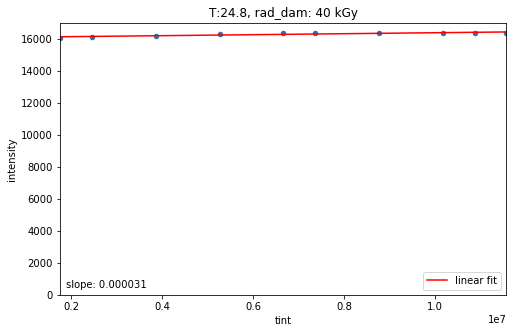

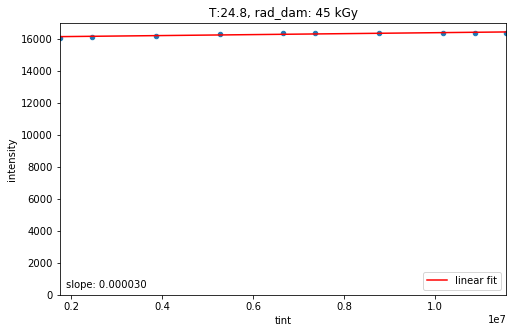

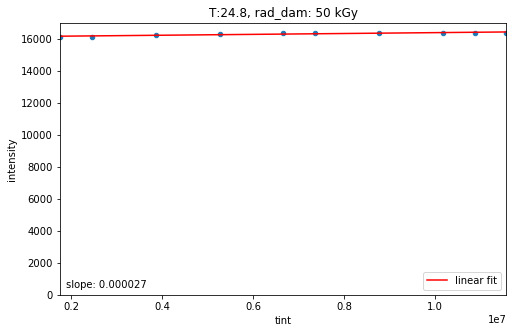

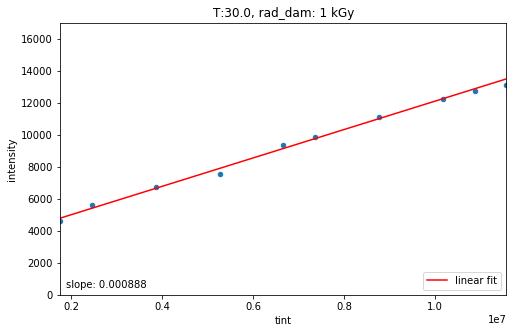

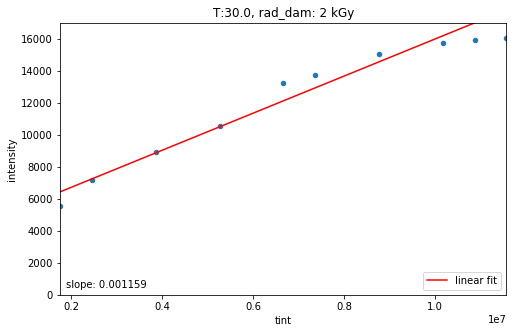

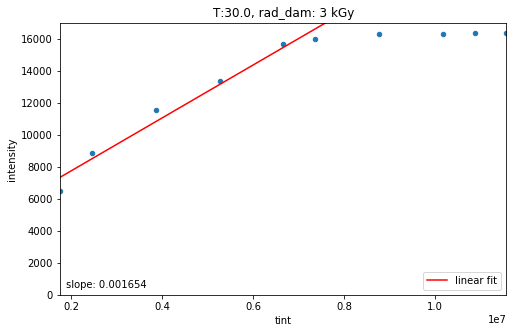

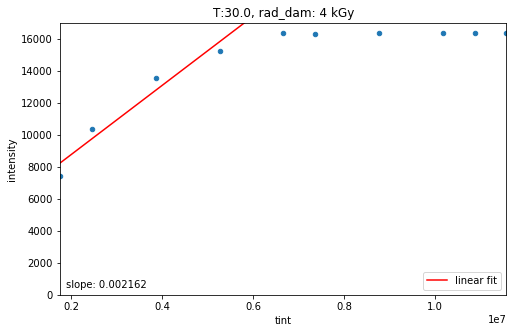

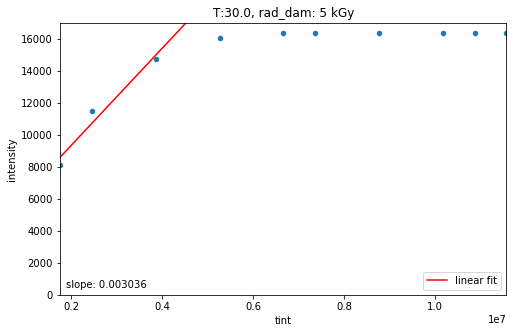

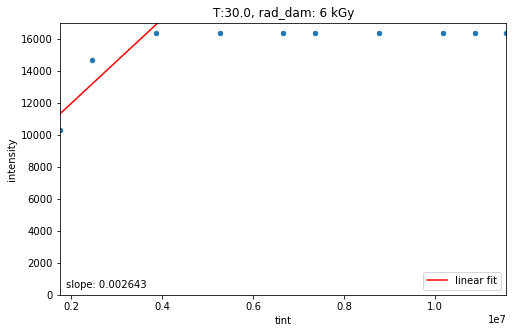

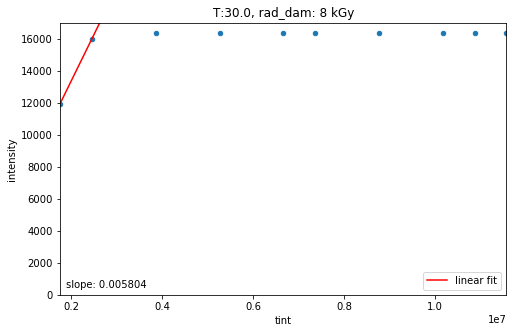

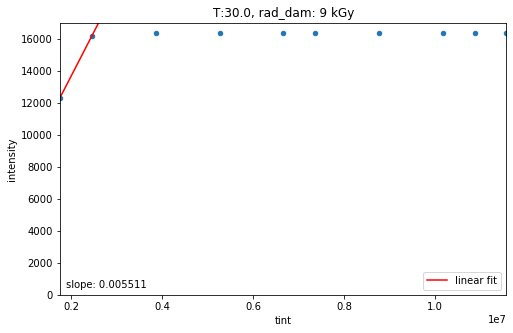

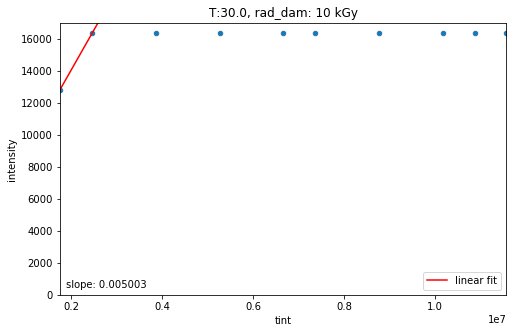

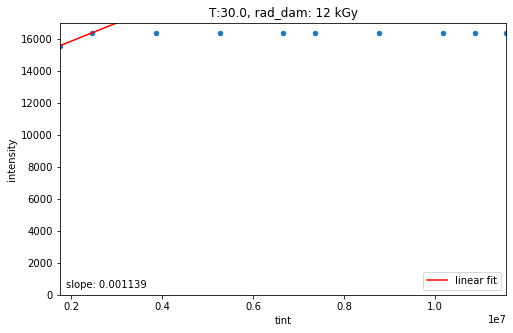

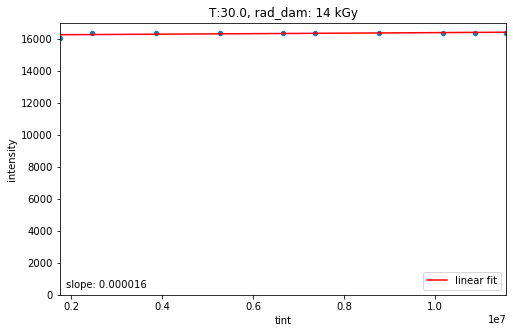

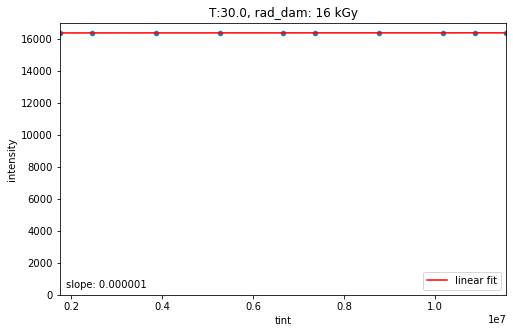

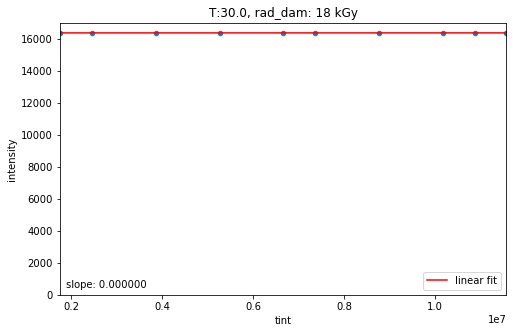

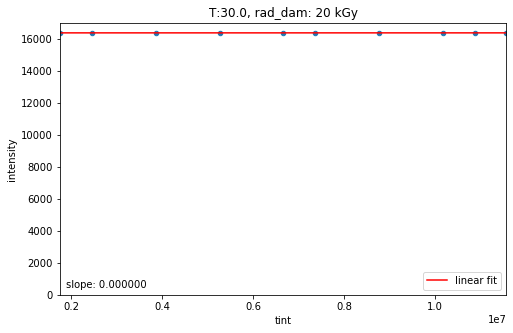

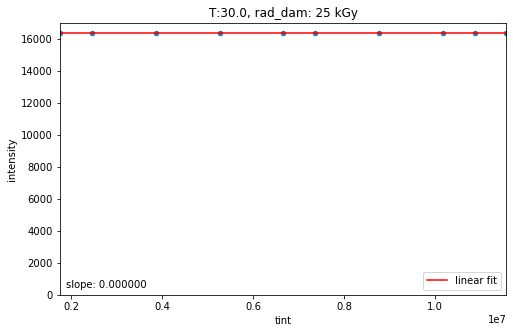

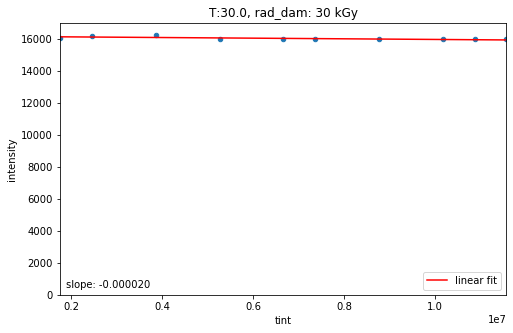

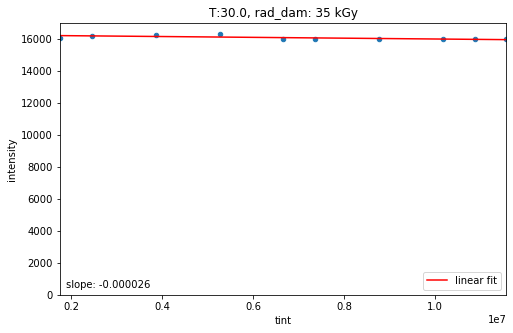

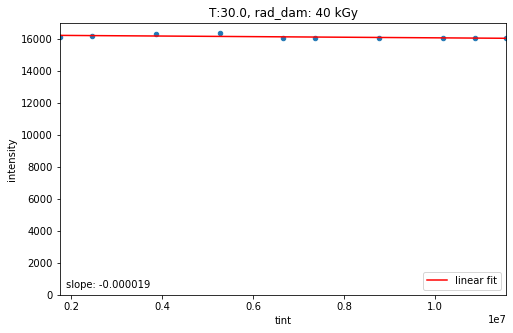

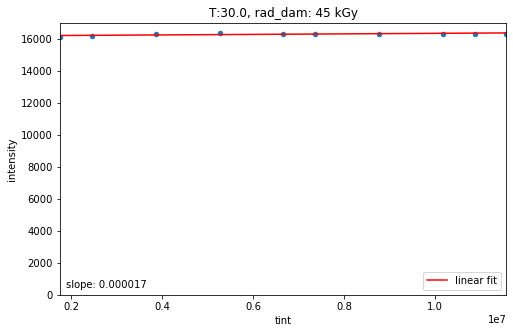

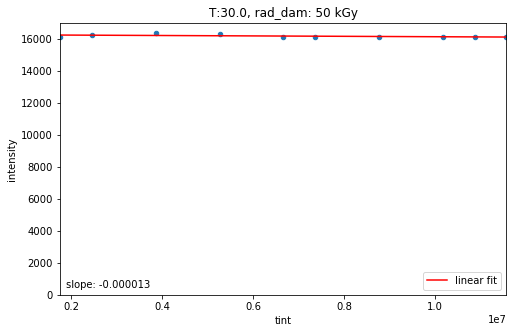

In [29]:
slopes = []
slope_err = []
temperatures = []
radiations = []
for (T, r), group in new_averaged.groupby(['T', 'rad_dam']):

    xx = np.array(group['tint'])
    yy = np.array(group['intensity'])
    cut = select_fit(yy)
    print(T,r)
    
    if cut>2:
        #pass
        #"""
        
        group.plot.scatter(x='tint', y = 'intensity', 
                       title = 'T:{}, rad_dam: {} kGy'.format(T,r), legend='pix intensity',figsize=(8,5),
                      ylim=(0,17000), xlim = (np.min(xx),np.max(xx)))
        p, V = np.polyfit(xx[:cut], yy[:cut], 1, cov=True)
        y_fit = p[0]*xx + p[1]

        plt.plot(xx, y_fit,c='red', label='linear fit')
        plt.legend(loc='lower right')
        slope=p[0]
        plt.text(1880100, 450, 'slope: {:.6f}'.format(slope))
        #"""
    elif cut ==2:
        #pass
        #"""
        #print(T, r, cut, np.max(yy))
        
        group.plot.scatter(x='tint', y = 'intensity', 
                       title = 'T:{}, rad_dam: {} kGy'.format(T,r), legend='pix intensity',figsize=(8,5),
                      ylim=(0,17000), xlim = (np.min(xx),np.max(xx)))
        p, V = np.polyfit(xx[:cut+1], yy[:cut+1], 1, cov=True)
        y_fit = p[0]*xx + p[1]

        plt.plot(xx, y_fit,c='red', label='linear fit')
        plt.legend(loc='lower right')
        slope=p[0]
        plt.text(1880100, 450, 'slope: {:.6f}'.format(slope))
        #"""
        
    elif cut==1:
        #pass
        #"""
        #print(T, r, cut, np.max(yy),xx[:cut], yy[:cut])
        
        group.plot.scatter(x='tint', y = 'intensity', 
                       title = 'T:{}, rad_dam: {} kGy'.format(T,r), legend='pix intensity',figsize=(8,5),
                      ylim=(0,17000), xlim = (np.min(xx),np.max(xx)))
        x1 = xx[0]
        x2 = xx[1]
        y1 = yy[0]
        y2 = yy[1]
        m = (y1-y2)/(x1-x2)
        q = (x1*y2 - x2*y1)/(x1-x2)
        y_fit = m * xx + q
        slope = m
        plt.plot(xx, y_fit,c='red', label='linear fit')
        plt.legend(loc='lower right')
        plt.text(1880100, 450, 'slope: {:.6f}'.format(slope))
        #"""
        
    elif cut==0:
        #pass
        #"""
        #print(T, r, cut, np.max(yy))
        group.plot.scatter(x='tint', y = 'intensity', 
                       title = 'T:{}, rad_dam: {} kGy'.format(T,r), legend='pix intensity',figsize=(8,5),
                      ylim=(0,17000), xlim = (np.min(xx),np.max(xx)))
        p, V = np.polyfit(xx, yy, 1, cov=True)
        y_fit = p[0]*xx + p[1]
        slope = p[0]
        plt.plot(xx, y_fit,c='red', label='linear fit')
        plt.legend(loc='lower right')
        plt.text(1880100, 450, 'slope: {:.6f}'.format(slope))
        #"""
    else:
        
        print('fuck')
    slopes.append(slope)
    #slope_err.append(V[0][0])
    temperatures.append(T)
    radiations.append(r)

    plt.show()
#    print('fit: ({:.6f} +/- {:.6f}) x + {:.6f} +/- {:.6f}'.format(p[0], np.sqrt(V[0][0]),p[1], np.sqrt(V[1][1])))
    #plt.savefig('T_{}_rad_dam_{}_slope_{:.6f}.png'.format(T, r, slope))


rad_dam
1     AxesSubplot(0.125,0.125;0.62x0.755)
2     AxesSubplot(0.125,0.125;0.62x0.755)
3     AxesSubplot(0.125,0.125;0.62x0.755)
4     AxesSubplot(0.125,0.125;0.62x0.755)
5     AxesSubplot(0.125,0.125;0.62x0.755)
6     AxesSubplot(0.125,0.125;0.62x0.755)
8     AxesSubplot(0.125,0.125;0.62x0.755)
9     AxesSubplot(0.125,0.125;0.62x0.755)
10    AxesSubplot(0.125,0.125;0.62x0.755)
12    AxesSubplot(0.125,0.125;0.62x0.755)
14    AxesSubplot(0.125,0.125;0.62x0.755)
16    AxesSubplot(0.125,0.125;0.62x0.755)
18    AxesSubplot(0.125,0.125;0.62x0.755)
20    AxesSubplot(0.125,0.125;0.62x0.755)
25    AxesSubplot(0.125,0.125;0.62x0.755)
30    AxesSubplot(0.125,0.125;0.62x0.755)
35    AxesSubplot(0.125,0.125;0.62x0.755)
40    AxesSubplot(0.125,0.125;0.62x0.755)
45    AxesSubplot(0.125,0.125;0.62x0.755)
50    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

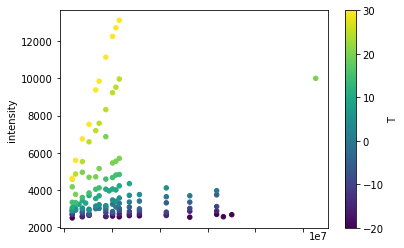

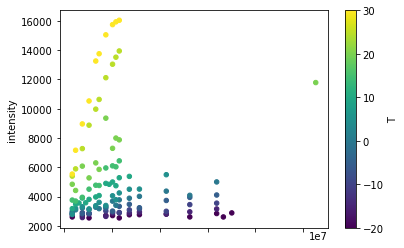

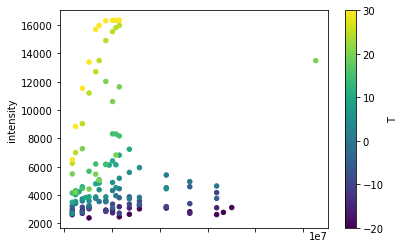

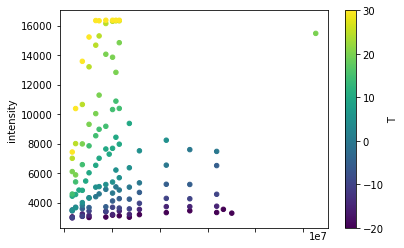

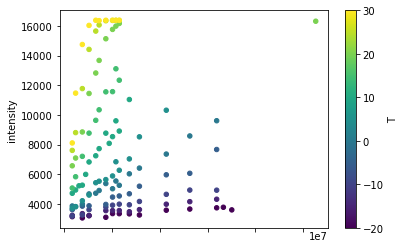

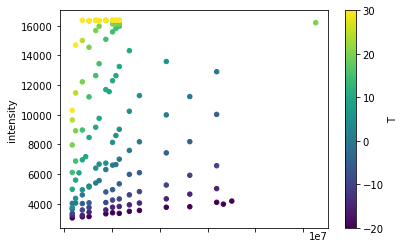

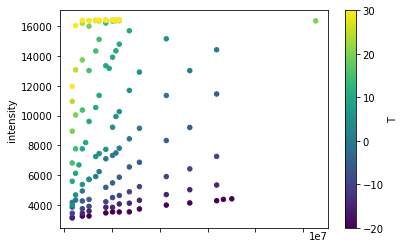

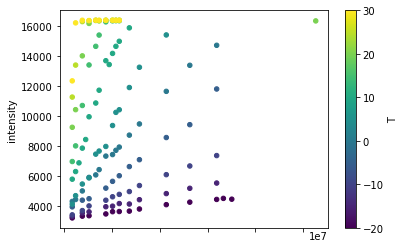

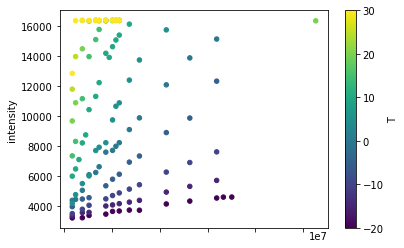

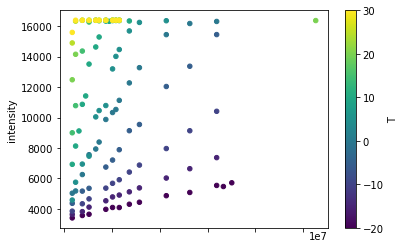

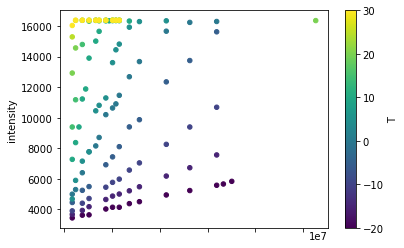

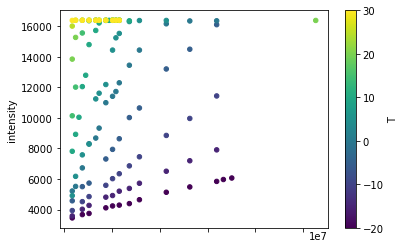

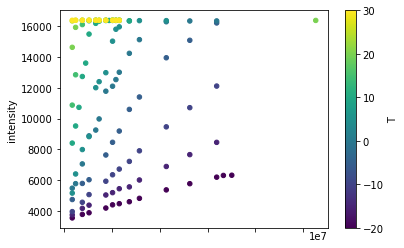

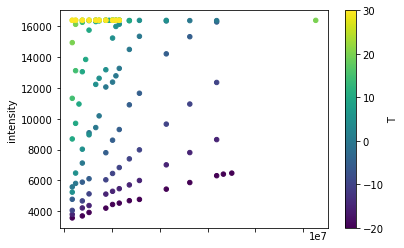

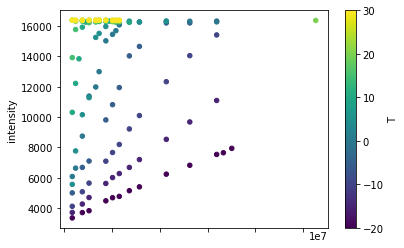

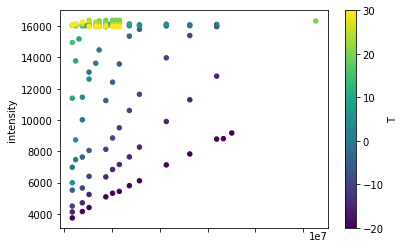

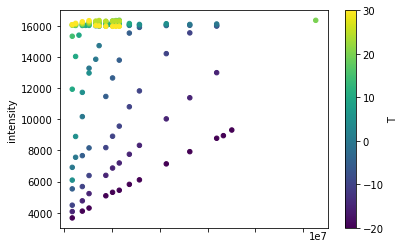

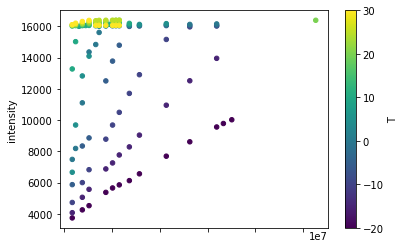

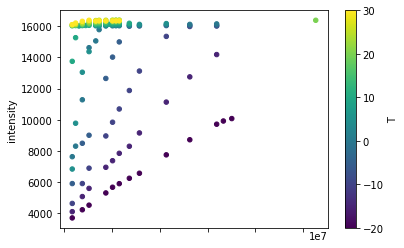

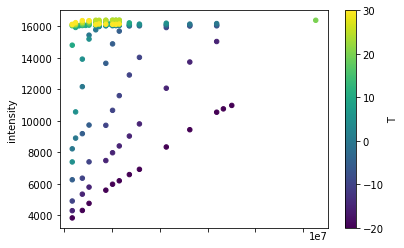

In [145]:
averaged.reset_index().groupby(['rad_dam']).plot.scatter(x ='tint',y = 'intensity',c='T', style=['x'], colormap='viridis')

T
-20.0    AxesSubplot(0.125,0.125;0.62x0.755)
-15.0    AxesSubplot(0.125,0.125;0.62x0.755)
-10.0    AxesSubplot(0.125,0.125;0.62x0.755)
-5.0     AxesSubplot(0.125,0.125;0.62x0.755)
 0.1     AxesSubplot(0.125,0.125;0.62x0.755)
 4.9     AxesSubplot(0.125,0.125;0.62x0.755)
 10.0    AxesSubplot(0.125,0.125;0.62x0.755)
 14.9    AxesSubplot(0.125,0.125;0.62x0.755)
 20.0    AxesSubplot(0.125,0.125;0.62x0.755)
 24.8    AxesSubplot(0.125,0.125;0.62x0.755)
 30.0    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

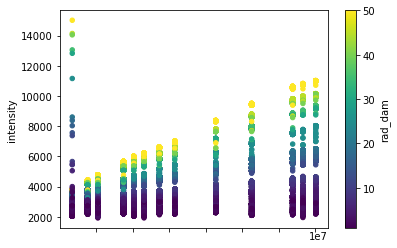

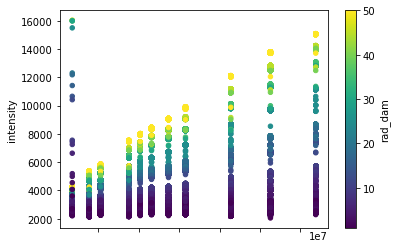

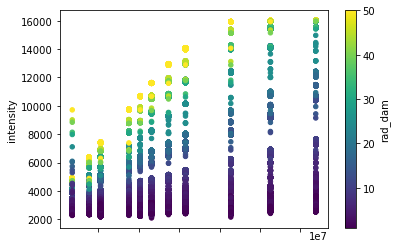

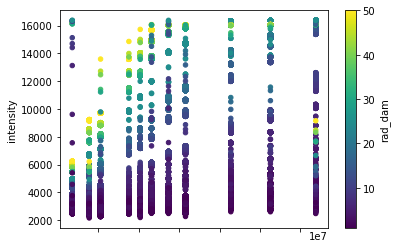

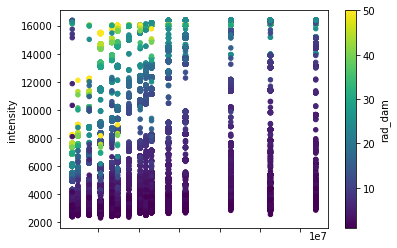

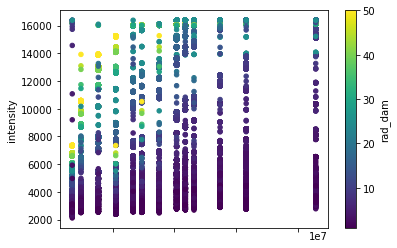

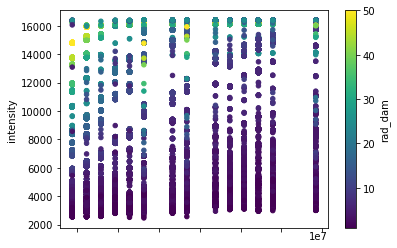

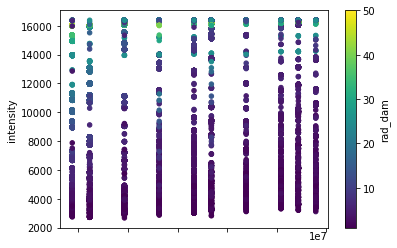

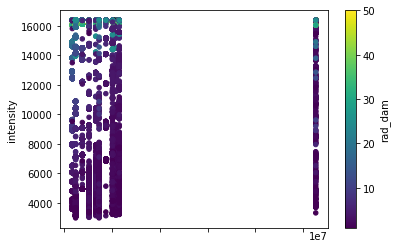

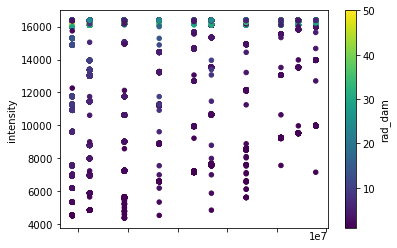

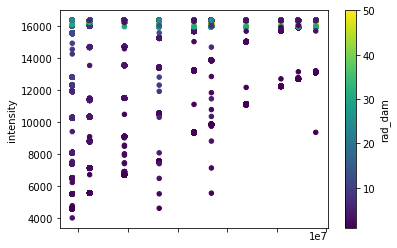

In [146]:
df.groupby(['T']).plot.scatter(x ='tint',y = 'intensity',c='rad_dam', style=['x'], colormap='viridis')

In [147]:
new_averaged

T      tint  rad_dam  intensity
0    -20.0   1753440        1   2491.790
1    -20.0   1753440        2   2605.810
2    -20.0   1753440        3   2804.695
3    -20.0   1753440        4   3032.755
4    -20.0   1753440        5   3144.850
...    ...       ...      ...        ...
2575  30.0  11572704       30  15977.000
2576  30.0  11572704       35  15980.510
2577  30.0  11572704       40  16059.255
2578  30.0  11572704       45  16342.970
2579  30.0  11572704       50  16143.635

[2580 rows x 4 columns]

In [196]:
slopes = []
slope_err = []
temperatures = []
radiations = []
for (T,r), group in new_averaged.groupby(['T', 'rad_dam']):
    #group.plot.scatter(x='tint', y = 'intensity', 
    #                   title = 'T:{}, rad_dam: {}'.format(T,r), legend='pix intensity',
    #                  ylim=(0,17000), figsize=(8,5))
    x1 = group['tint']
    y1 = group['intensity']
    p, V = np.polyfit(x1, y1, 1, cov=True)
    y2 = p[0]*x1 + p[1]
    print('slope: {:.6f}'.format(p[0]), T, r)
    slopes.append(p[0])
    slope_err.append(V[0][0])
    temperatures.append(T)
    radiations.append(r)

slope: 0.000002 -20.0 1
slope: 0.000005 -20.0 2
slope: 0.000005 -20.0 3
slope: 0.000013 -20.0 4
slope: 0.000020 -20.0 5
slope: 0.000032 -20.0 6
slope: 0.000038 -20.0 8
slope: 0.000040 -20.0 9
slope: 0.000044 -20.0 10
slope: 0.000067 -20.0 12
slope: 0.000071 -20.0 14
slope: 0.000078 -20.0 16
slope: 0.000085 -20.0 18
slope: 0.000089 -20.0 20
slope: 0.000136 -20.0 25
slope: 0.000161 -20.0 30
slope: 0.000166 -20.0 35
slope: 0.000187 -20.0 40
slope: 0.000191 -20.0 45
slope: 0.000216 -20.0 50
slope: 0.000008 -15.0 1
slope: 0.000013 -15.0 2
slope: 0.000009 -15.0 3
slope: 0.000026 -15.0 4
slope: 0.000037 -15.0 5
slope: 0.000060 -15.0 6
slope: 0.000070 -15.0 8
slope: 0.000073 -15.0 9
slope: 0.000078 -15.0 10
slope: 0.000123 -15.0 12
slope: 0.000126 -15.0 14
slope: 0.000140 -15.0 16
slope: 0.000154 -15.0 18
slope: 0.000159 -15.0 20
slope: 0.000240 -15.0 25
slope: 0.000287 -15.0 30
slope: 0.000293 -15.0 35
slope: 0.000326 -15.0 40
slope: 0.000333 -15.0 45
slope: 0.000360 -15.0 50
slope: 0.000012 

In [36]:
radiations = np.array(radiations)
temperatures = np.array(temperatures)
slopes = np.array(slopes)
#slope_err = np.array(slope_err)

In [685]:
import matplotlib.pyplot as plt

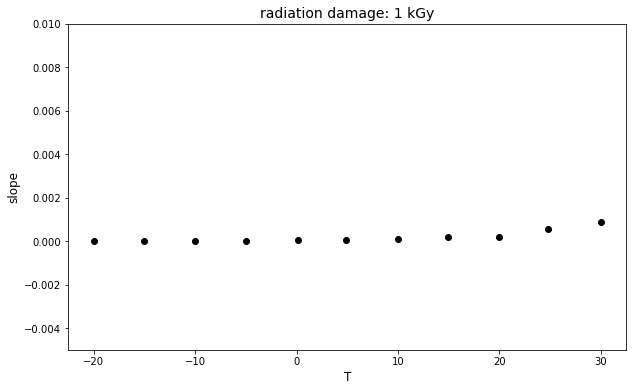

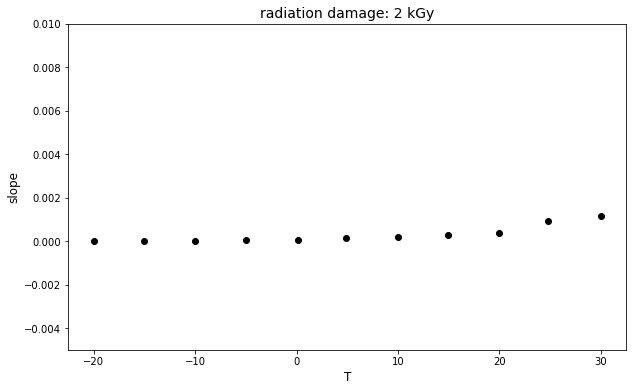

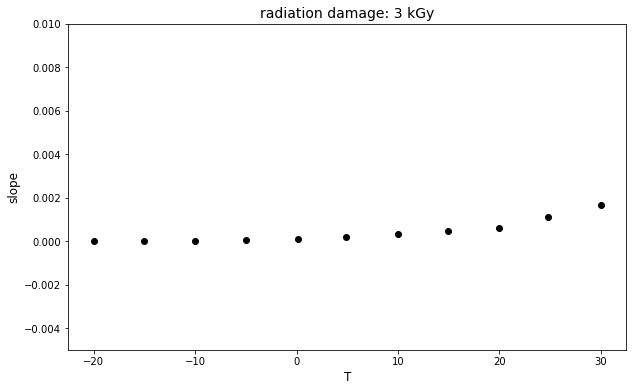

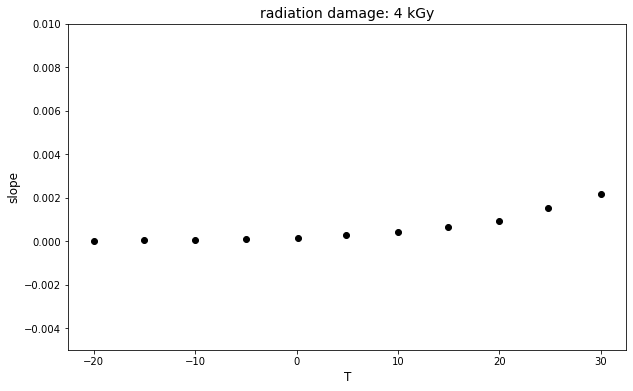

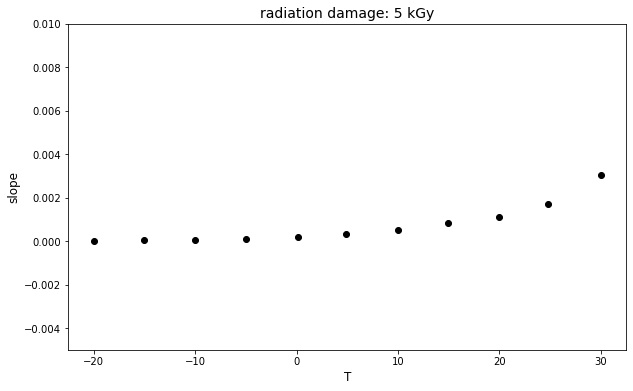

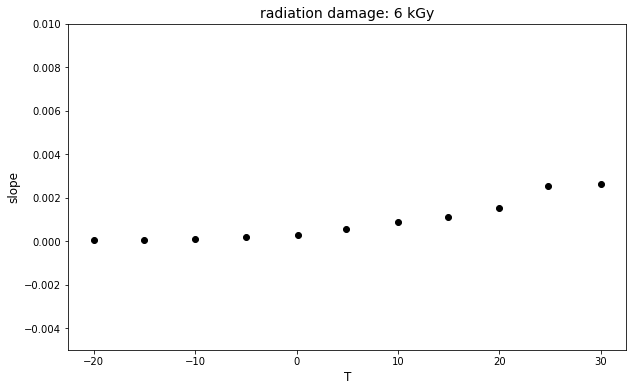

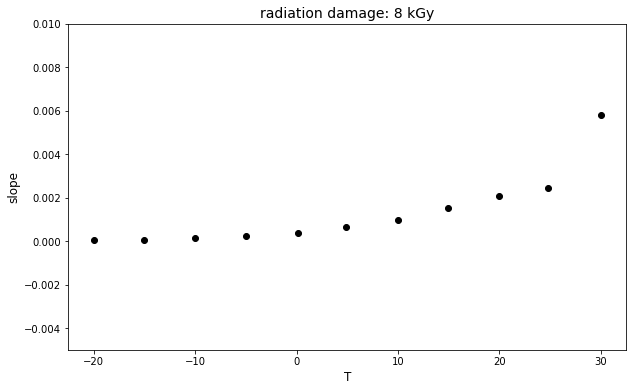

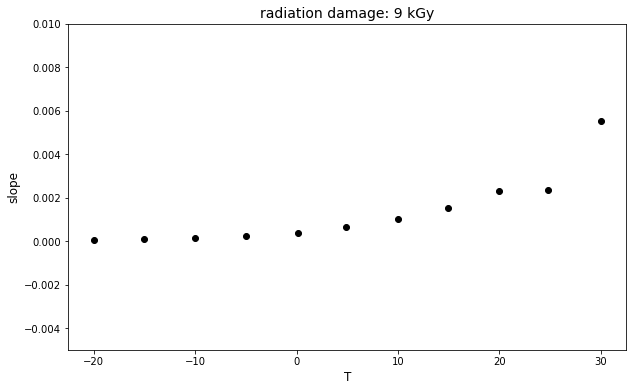

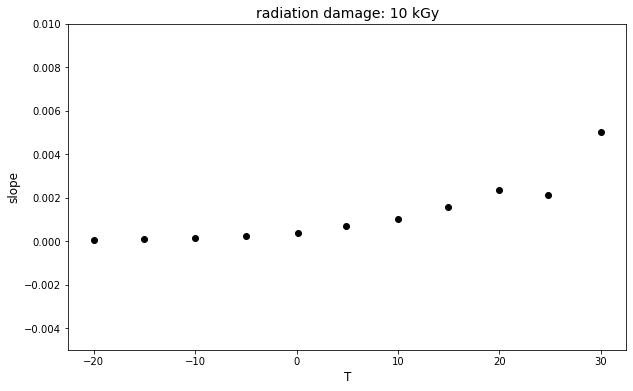

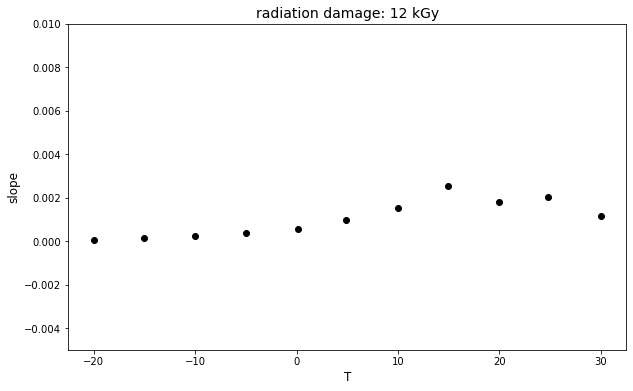

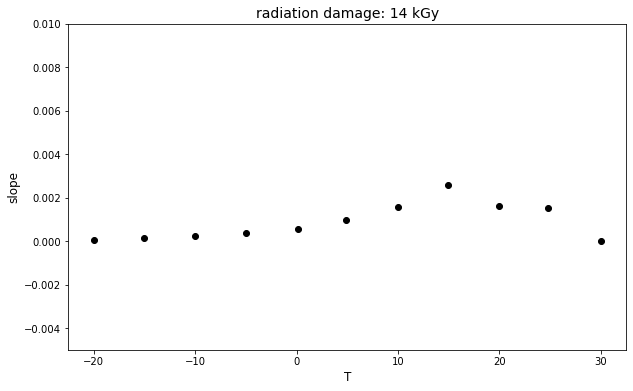

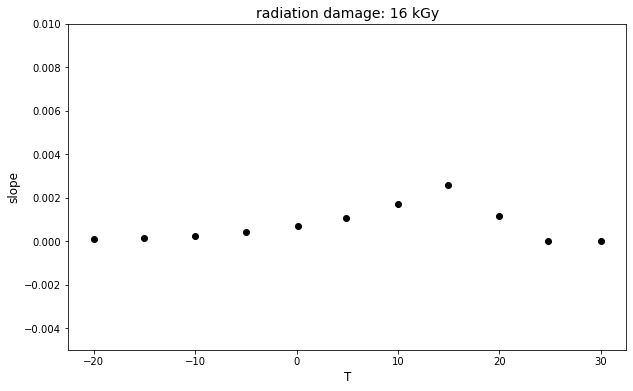

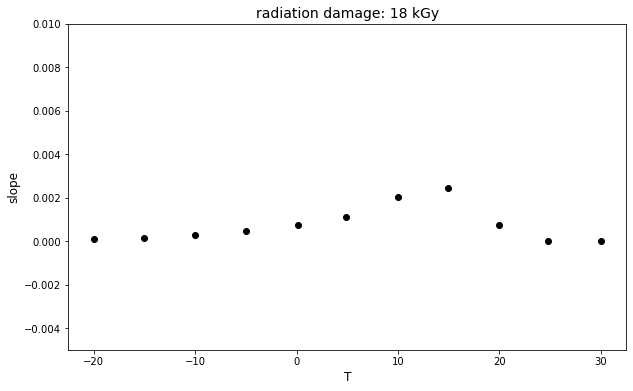

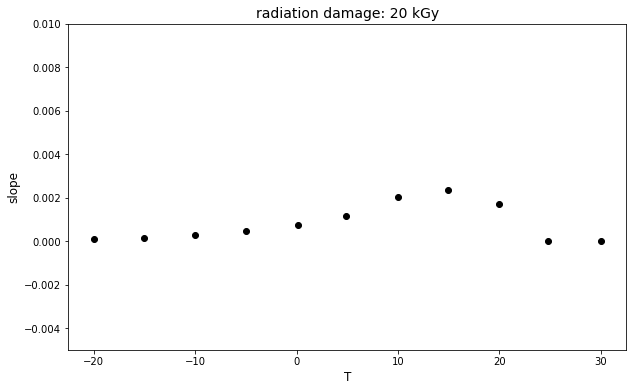

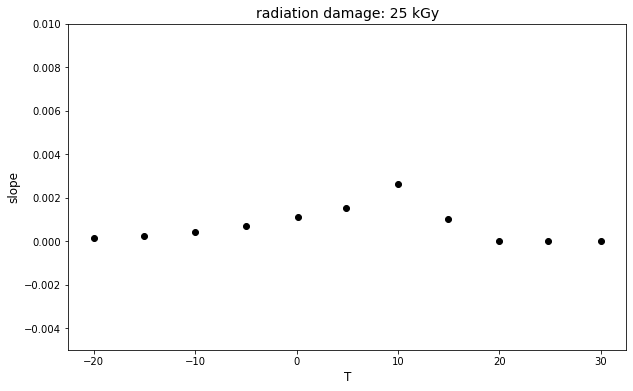

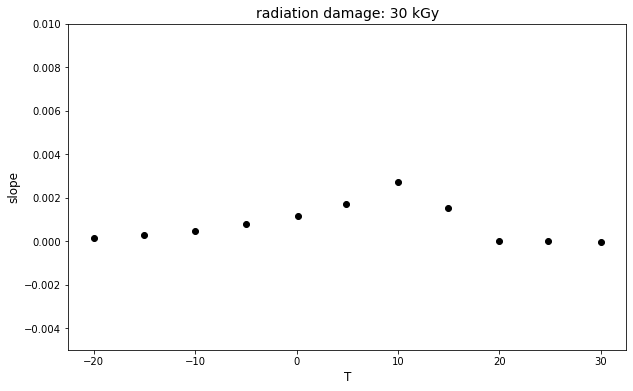

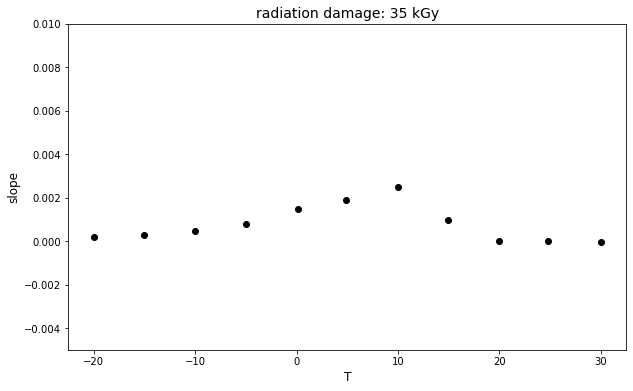

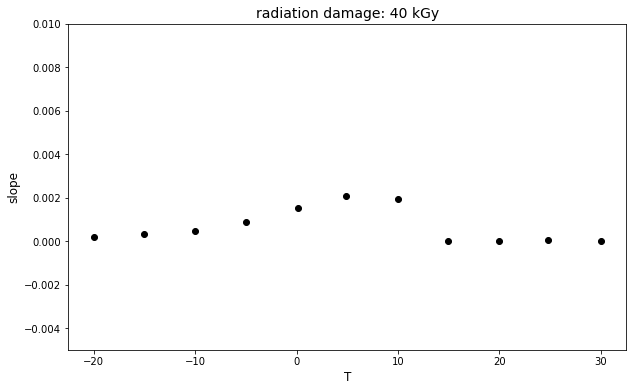

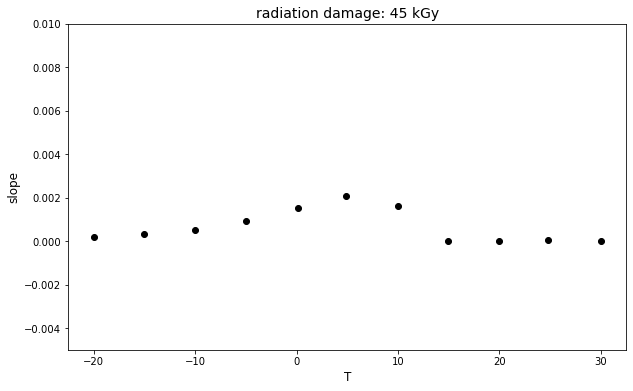

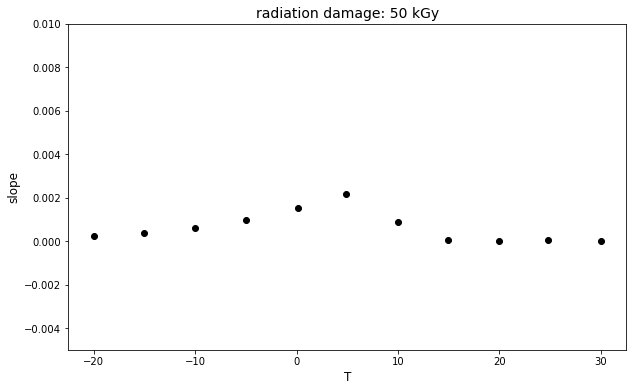

In [56]:
for r in sorted(rad_dam):
    plt.figure(figsize=(10,6))
    plt.scatter(x = temperatures[np.argwhere(radiations==r)], y=slopes[np.argwhere(radiations==r)], 
                c='k')
    plt.ylabel('slope', size=12)
    plt.xlabel('T', size=12)
    plt.ylim(-0.005, 0.01)
    plt.title('radiation damage: {} kGy'.format(r), size=14)
    plt.savefig('Slope_vs_T_rad_dam{}'.format(r))
#    plt.show()

In [59]:
np.unique(temperatures)

array([-20. , -15. , -10. ,  -5. ,   0.1,   4.9,  10. ,  14.9,  20. ,
        24.8,  30. ])

In [50]:
slopes[np.where(temperatures==20.0)]

array([1.90635064e-04, 3.73251851e-04, 5.92800972e-04, 9.11227777e-04,
       1.10171855e-03, 1.49865170e-03, 2.08341369e-03, 2.30433963e-03,
       2.32679800e-03, 1.81582235e-03, 1.59082281e-03, 1.15002358e-03,
       7.60340611e-04, 1.69142420e-03, 1.06583400e-07, 3.87218722e-06,
       4.82386256e-06, 4.84178648e-06, 4.73059318e-06, 4.28871846e-06])

In [46]:
slopes[]

array([ 1.64151617e-06,  2.85687280e-06,  1.17748169e-06,  1.56838857e-05,
        2.22723328e-05,  3.16363419e-05,  3.88367705e-05,  4.13152096e-05,
        4.52479365e-05,  6.72468612e-05,  7.08239038e-05,  7.89522180e-05,
        8.71905538e-05,  9.09870410e-05,  1.36590259e-04,  1.61612995e-04,
        1.66546095e-04,  1.88838540e-04,  1.94750437e-04,  2.18903938e-04,
        7.04300995e-06,  1.03139419e-05,  9.69912797e-06,  2.95970101e-05,
        3.71123695e-05,  5.97220524e-05,  7.22548442e-05,  7.43109267e-05,
        7.87091688e-05,  1.22140704e-04,  1.24459877e-04,  1.42810412e-04,
        1.55726857e-04,  1.60153746e-04,  2.40140695e-04,  2.90805643e-04,
        2.96072611e-04,  3.36537933e-04,  3.44932365e-04,  3.79995185e-04,
        9.99569131e-06,  1.96717736e-05,  1.52130362e-05,  5.43350429e-05,
        6.99150675e-05,  1.01776108e-04,  1.22234140e-04,  1.32286568e-04,
        1.38354749e-04,  2.11814706e-04,  2.22641743e-04,  2.46219047e-04,
        2.74432705e-04,  

In [145]:
slopes = []
slope_errs = []
inter_errs = []
temperatures = []
radiations = []
intercepts = []
for (T, r), group in new_averaged.groupby(['T', 'rad_dam']):
    
    xx = np.array(group['tint'])
    yy = np.array(group['intensity'])
    cut = select_fit(yy)
    slope=None
    intercept=None
    
    if cut>2:

        p, V = np.polyfit(xx[:cut], yy[:cut], 1, cov=True)
        y_fit = p[0]*xx + p[1]
        intercept = p[1]
        slope=p[0]
        slope_err = V[0][0]
        inter_err = V[0][1]
    elif cut ==2:
        
        p, V = np.polyfit(xx[:cut+1], yy[:cut+1], 1, cov=True)
        y_fit = p[0]*xx + p[1]

        slope=p[0]
        intercept=p[1]
        slope_err = V[0][0]
        inter_err = V[0][1]
    elif cut==1:
        
        x1 = xx[0]
        x2 = xx[1]
        y1 = yy[0]
        y2 = yy[1]
        m = (y1-y2)/(x1-x2)
        q = (x1*y2 - x2*y1)/(x1-x2)
        y_fit = m * xx + q
        slope = m
        intercept=q
        slope_err = 0
        inter_err = 0
    elif cut==0:
        
        #print(T, r, cut, np.max(yy))
        
        p, V = np.polyfit(xx, yy, 1, cov=True)
        y_fit = p[0]*xx + p[1]
        slope = p[0]
        intercept = p[1]
        slope_err = V[0][0]
        inter_err = V[0][1]
        
    print(T,r, cut, slope)
    
    
    slopes.append(slope)
    slope_errs.append(slope_err)
    inter_errs.append(inter_err)
    temperatures.append(T)
    radiations.append(r)
    intercepts.append(intercept)
    #plt.show()
#    print('fit: ({:.6f} +/- {:.6f}) x + {:.6f} +/- {:.6f}'.format(p[0], np.sqrt(V[0][0]),p[1], np.sqrt(V[1][1])))
    #plt.savefig('T_{}_rad_dam_{}_slope_{:.6f}.png'.format(T, r, slope))

radiations = np.array(radiations)
temperatures = np.array(temperatures)
slopes = np.array(slopes)
intercepts = np.array(intercepts)
slope_errs = np.array(slope_errs)
inter_errs = np.array(inter_errs)

-20.0 1 12 1.6415161746195573e-06
-20.0 2 12 2.8568728001141493e-06
-20.0 3 12 1.1774816890828876e-06
-20.0 4 12 1.5683885725897085e-05
-20.0 5 12 2.2272332764631696e-05
-20.0 6 12 3.163634194243858e-05
-20.0 8 12 3.883677050169452e-05
-20.0 9 12 4.1315209585303844e-05
-20.0 10 12 4.5247936458980126e-05
-20.0 12 12 6.724686119018038e-05
-20.0 14 12 7.082390382260359e-05
-20.0 16 12 7.895221803483353e-05
-20.0 18 12 8.71905538024861e-05
-20.0 20 12 9.0987041045811e-05
-20.0 25 12 0.00013659025912690837
-20.0 30 12 0.00016161299515089837
-20.0 35 12 0.00016654609492574893
-20.0 40 12 0.00018883854042139257
-20.0 45 12 0.00019475043685150657
-20.0 50 12 0.00021890393808725718
-15.0 1 10 7.043009947630279e-06
-15.0 2 10 1.0313941892396845e-05
-15.0 3 10 9.699127973155772e-06
-15.0 4 10 2.9597010058595163e-05
-15.0 5 10 3.7112369458407423e-05
-15.0 6 10 5.972205238863675e-05
-15.0 8 10 7.225484415533166e-05
-15.0 9 10 7.431092667493104e-05
-15.0 10 10 7.870916879190849e-05
-15.0 12 10 0.000

In [135]:
slopes = []
slope_err = []
temperatures = []
radiations = []
intercepts = []
for (T, r), group in new_averaged.groupby(['T', 'rad_dam']):
    
    xx = np.array(group['tint'])
    yy = np.array(group['intensity'])
    cut = select_fit(yy)
    slope=None
    intercept=None
    if cut>2:
        if cut>=3:
        #pass
        #"""
        
            p, V = np.polyfit(xx[:cut], yy[:cut], 1, cov=True)
            y_fit = p[0]*xx + p[1]
            intercept = p[1]
            slope=p[0]
            #"""
        else:
            pass
    
    elif cut ==2:
        pass
        """
        #print(T, r, cut, np.max(yy))
        
        p, V = np.polyfit(xx[:cut+1], yy[:cut+1], 1, cov=True)
        y_fit = p[0]*xx + p[1]

        slope=p[0]
        intercept=p[1]
        """
        
    elif cut==1:
        pass
        """
        #print(T, r, cut, np.max(yy),xx[:cut], yy[:cut])
        
        x1 = xx[0]
        x2 = xx[1]
        y1 = yy[0]
        y2 = yy[1]
        m = (y1-y2)/(x1-x2)
        q = (x1*y2 - x2*y1)/(x1-x2)
        y_fit = m * xx + q
        slope = m
        intercept=q
        """
        
    elif cut==0:
        
        pass
        """
        #print(T, r, cut, np.max(yy))
        
        p, V = np.polyfit(xx, yy, 1, cov=True)
        y_fit = p[0]*xx + p[1]
        slope = p[0]
        intercept = p[1]
        """
        
    print(T,r, cut, slope)
    
    
    slopes.append(slope)
    #slope_err.append(V[0][0])
    temperatures.append(T)
    radiations.append(r)
    intercepts.append(intercept)
    #plt.show()
#    print('fit: ({:.6f} +/- {:.6f}) x + {:.6f} +/- {:.6f}'.format(p[0], np.sqrt(V[0][0]),p[1], np.sqrt(V[1][1])))
    #plt.savefig('T_{}_rad_dam_{}_slope_{:.6f}.png'.format(T, r, slope))

radiations = np.array(radiations)
temperatures = np.array(temperatures)
slopes = np.array(slopes)
intercepts = np.array(intercepts)

-20.0 1 12 1.6415161746195573e-06
-20.0 2 12 2.8568728001141493e-06
-20.0 3 12 1.1774816890828876e-06
-20.0 4 12 1.5683885725897085e-05
-20.0 5 12 2.2272332764631696e-05
-20.0 6 12 3.163634194243858e-05
-20.0 8 12 3.883677050169452e-05
-20.0 9 12 4.1315209585303844e-05
-20.0 10 12 4.5247936458980126e-05
-20.0 12 12 6.724686119018038e-05
-20.0 14 12 7.082390382260359e-05
-20.0 16 12 7.895221803483353e-05
-20.0 18 12 8.71905538024861e-05
-20.0 20 12 9.0987041045811e-05
-20.0 25 12 0.00013659025912690837
-20.0 30 12 0.00016161299515089837
-20.0 35 12 0.00016654609492574893
-20.0 40 12 0.00018883854042139257
-20.0 45 12 0.00019475043685150657
-20.0 50 12 0.00021890393808725718
-15.0 1 10 7.043009947630279e-06
-15.0 2 10 1.0313941892396845e-05
-15.0 3 10 9.699127973155772e-06
-15.0 4 10 2.9597010058595163e-05
-15.0 5 10 3.7112369458407423e-05
-15.0 6 10 5.972205238863675e-05
-15.0 8 10 7.225484415533166e-05
-15.0 9 10 7.431092667493104e-05
-15.0 10 10 7.870916879190849e-05
-15.0 12 10 0.000

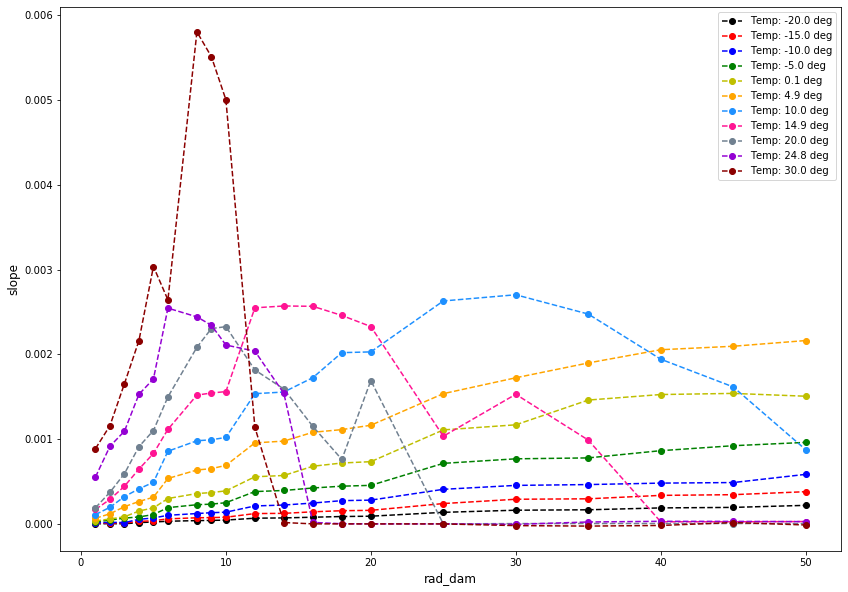

In [139]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
plt.figure(figsize=(14,10))
for r in sorted(np.unique(temperatures)):
    col = next(cs)
    plt.plot(radiations[np.argwhere(temperatures==r)], slopes[np.argwhere(temperatures==r)],'--o',
                c=col, label = 'Temp: {} deg'.format(r))
    plt.ylabel('slope', size=12)
    plt.xlabel('rad_dam', size=12)
    plt.legend(loc='upper right')
    #plt.ylim(-0.0005, 0.0005)
    #plt.title('Temperature: {} deg'.format(r), size=14)
plt.savefig('Slope_vs_T_rad_dam'.format(r))

/Users/cdesio/opt/anaconda3/envs/pyroot/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


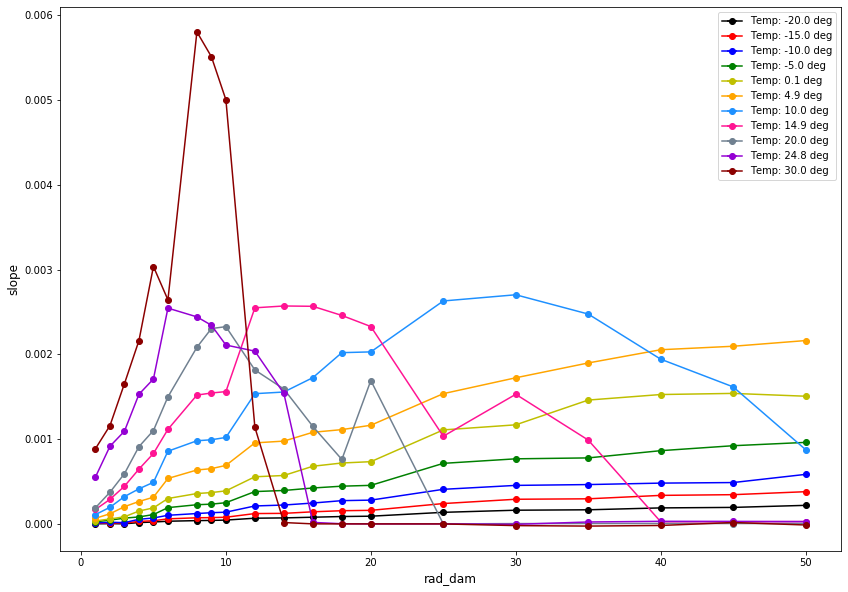

In [150]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
plt.figure(figsize=(14,10))
for r in sorted(np.unique(temperatures)):
    col = next(cs)
    plt.errorbar(x = radiations[np.argwhere(temperatures==r)], y= slopes[np.argwhere(temperatures==r)],
    xerr=slope_errs[np.argwhere(temperatures==r)],
                c=col, marker ='o',ecolor=col,label = 'Temp: {} deg'.format(r))
    plt.ylabel('slope', size=12)
    plt.xlabel('rad_dam', size=12)
    plt.legend(loc='upper right')
    #plt.ylim(-0.0005, 0.0005)
    #plt.title('Temperature: {} deg'.format(r), size=14)
#plt.savefig('Slope_vs_T_rad_dam'.format(r))

In [79]:
len(temperatures)

220

In [78]:
len(slopes)

220

In [80]:
len(radiations)

220

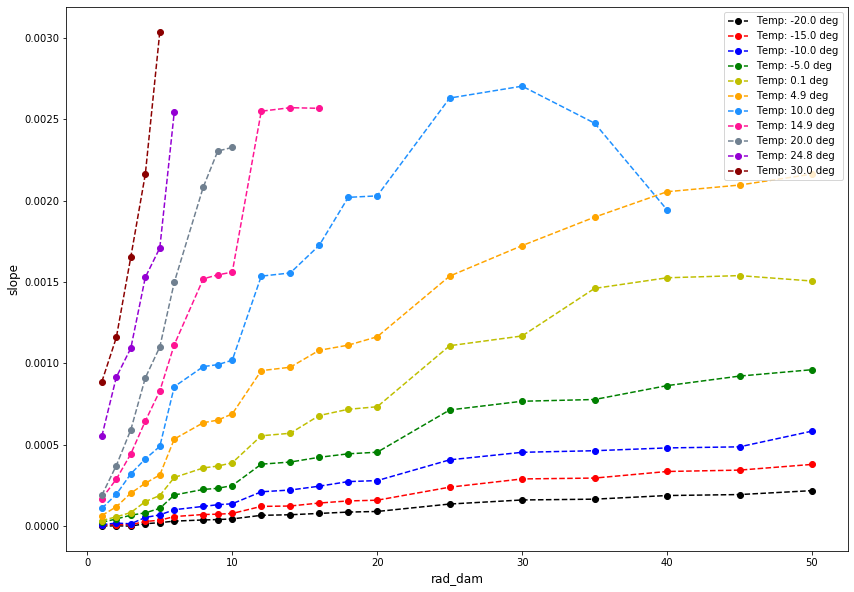

In [130]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
plt.figure(figsize=(14,10))
for r in sorted(np.unique(temperatures)):
    col = next(cs)
    plt.plot(radiations[np.argwhere(temperatures==r)], slopes[np.argwhere(temperatures==r)],'--o',
                c=col, label = 'Temp: {} deg'.format(r))
    plt.ylabel('slope', size=12)
    plt.xlabel('rad_dam', size=12)
    plt.legend(loc='upper right')
    #plt.ylim(-0.0005, 0.0005)
    #plt.title('Temperature: {} deg'.format(r), size=14)
    plt.savefig('Slope_vs_T_rad_dam{}_cut_out_saturation.png'.format(r))

In [ ]:
x = sorted(np.unique(radiations))
y =

In [119]:
from mpl_toolkits import mplot3d

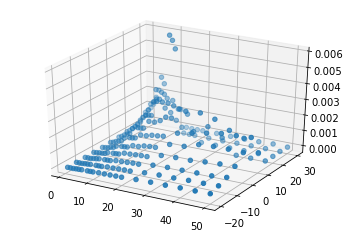

In [127]:
y = temperatures
z = slopes
x = radiations
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x,y,z)
plt.show()

In [ ]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
plt.figure(figsize=(14,10))
for r in sorted(np.unique(temperatures)):
    col = next(cs)
    plt.plot(radiations[np.argwhere(temperatures==r)], slopes[np.argwhere(temperatures==r)],'--o',
                c=col, label = 'Temp: {} deg'.format(r))
    plt.ylabel('slope', size=12)
    plt.xlabel('rad_dam', size=12)
    plt.legend(loc='upper right')

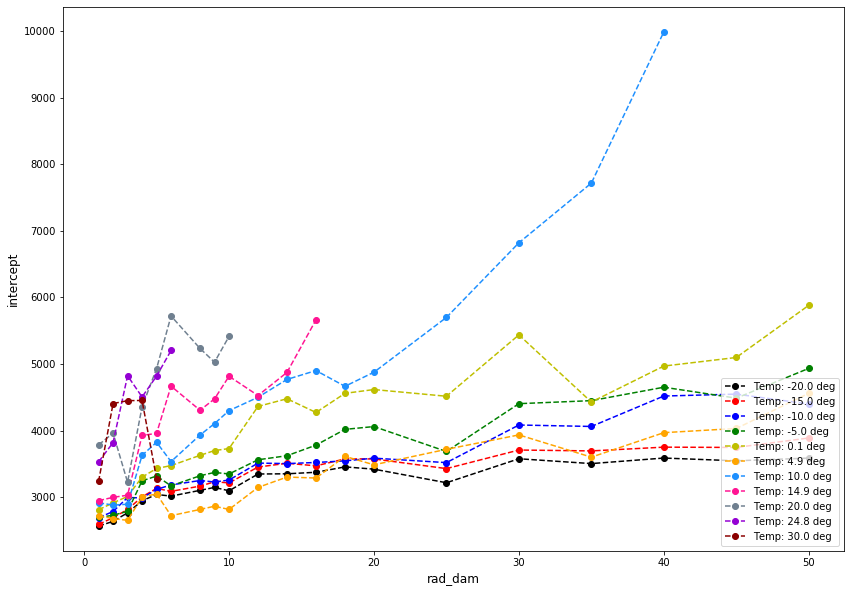

In [136]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
plt.figure(figsize=(14,10))
for r in sorted(np.unique(temperatures)):
    col = next(cs)
    plt.plot(radiations[np.argwhere(temperatures==r)], intercepts[np.argwhere(temperatures==r)],'--o',
                c=col, label = 'Temp: {} deg'.format(r))
    plt.ylabel('intercept', size=12)
    plt.xlabel('rad_dam', size=12)
    plt.legend(loc='lower right')
    #plt.ylim(-0.0005, 0.0005)
    #plt.title('Temperature: {} deg'.format(r), size=14)
    plt.savefig('Intercept_vs_T_rad_dam{}_cut_saturation.png'.format(r))

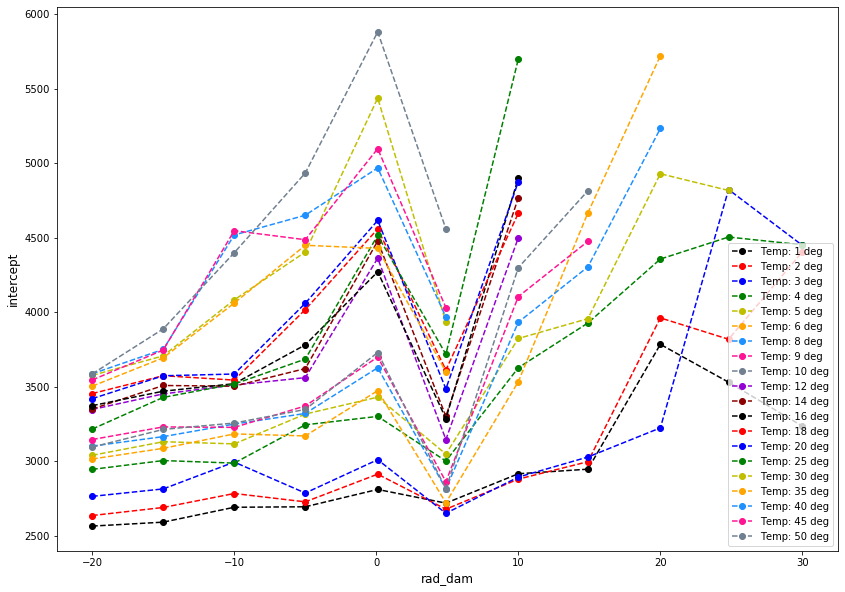

In [117]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']*2
cs = iter(colors)
plt.figure(figsize=(14,10))
for r in sorted(np.unique(radiations)):
    col = next(cs)
    plt.plot(temperatures[np.argwhere(radiations==r)], intercepts[np.argwhere(radiations==r)],'--o',
                c=col, label = 'Temp: {} deg'.format(r))
    plt.ylabel('intercept', size=12)
    plt.xlabel('rad_dam', size=12)
    plt.legend(loc='lower right')
    #plt.ylim(-0.0005, 0.0005)
    #plt.title('Temperature: {} deg'.format(r), size=14)
    #plt.savefig('Slope_vs_T_rad_dam{}'.format(r))

In [151]:
new_averaged.head()

T     tint  rad_dam    intensity
0 -20.0  1753440        1  2491.287112
1 -20.0  1753440        2  2605.309962
2 -20.0  1753440        3  2804.200650
3 -20.0  1753440        4  3032.274037
4 -20.0  1753440        5  3144.358712

In [153]:
np.unique(temperatures)

array([-20. , -15. , -10. ,  -5. ,   0.1,   4.9,  10. ,  14.9,  20. ,
        24.8,  30. ])

<Figure size 432x288 with 0 Axes>

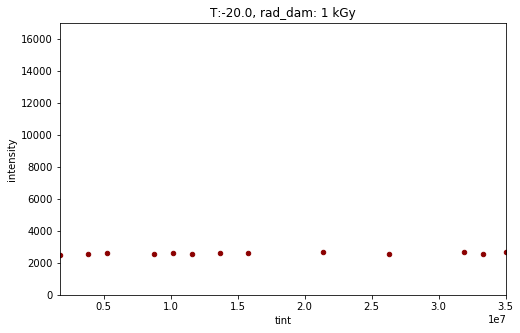

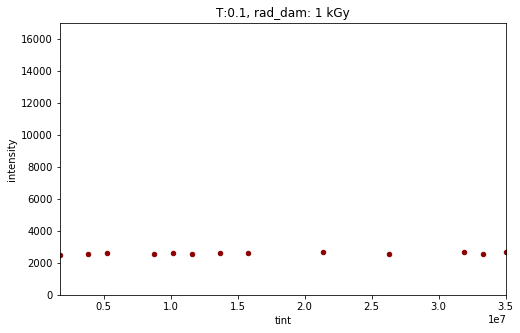

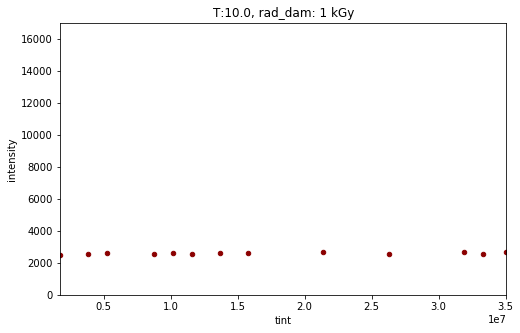

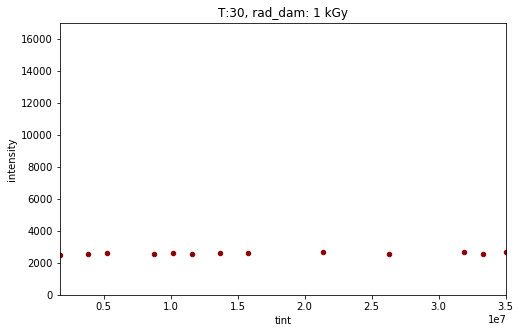

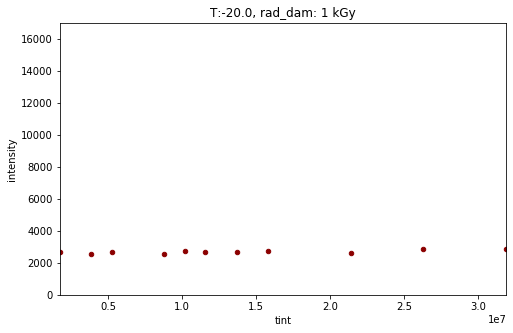

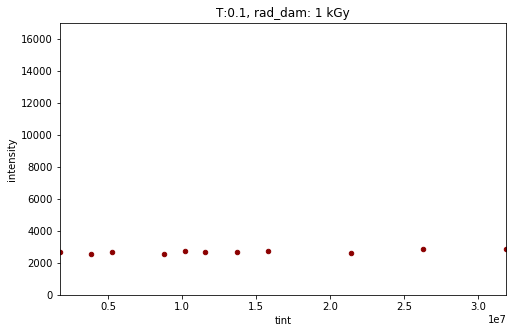

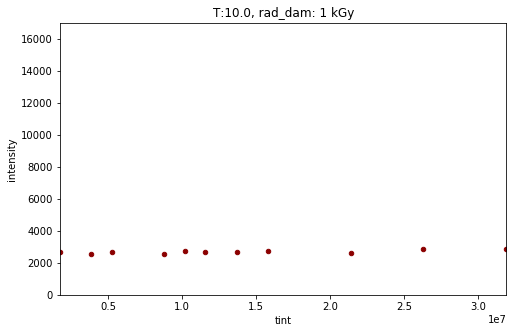

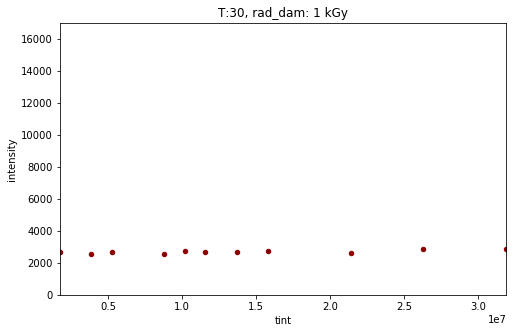

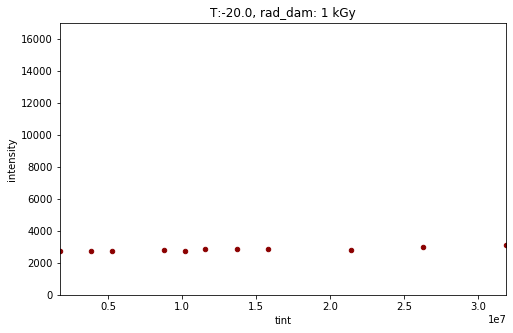

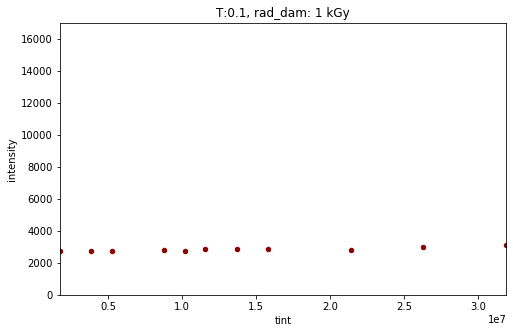

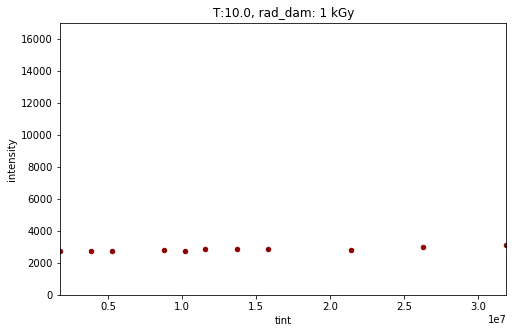

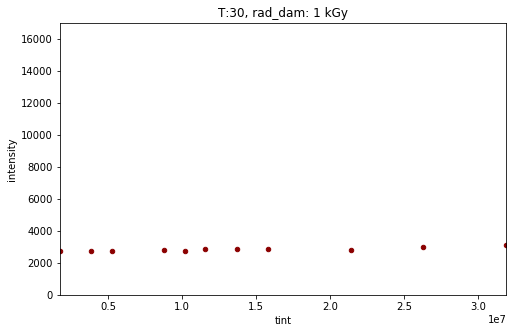

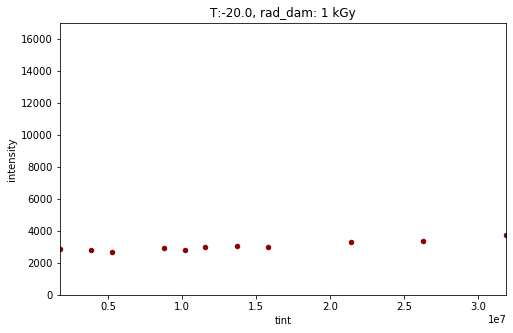

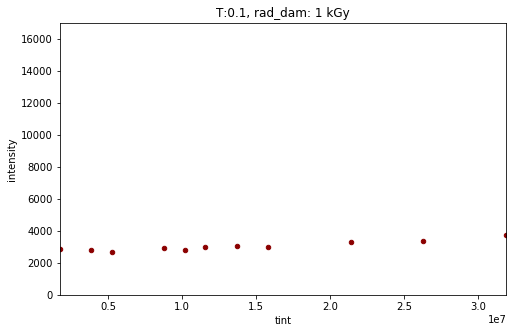

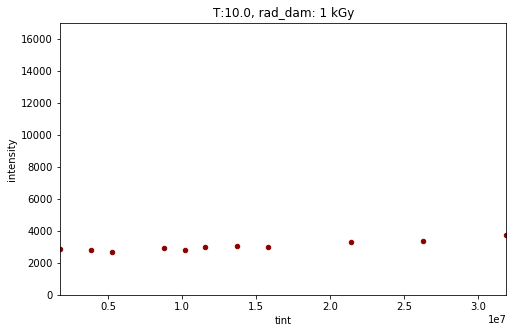

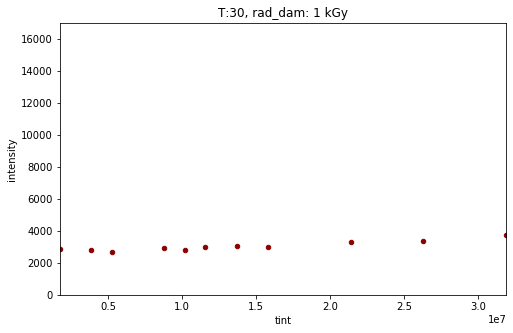

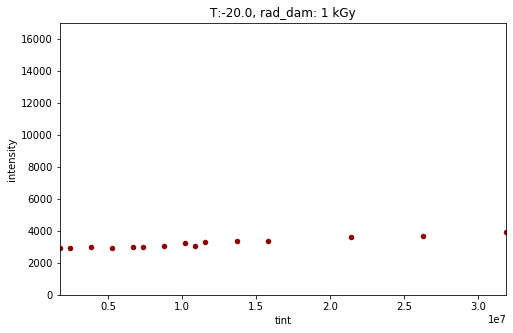

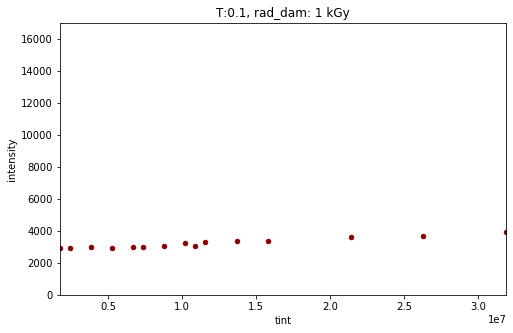

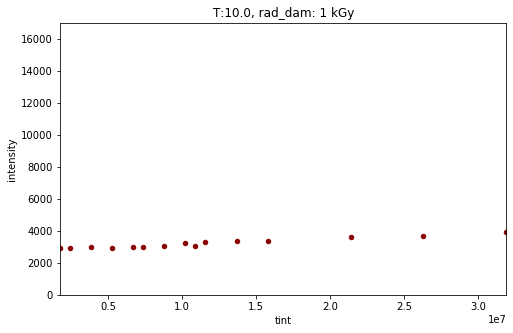

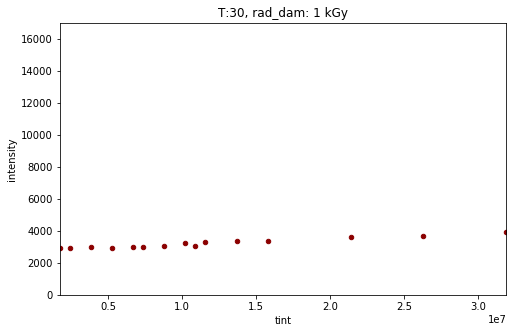

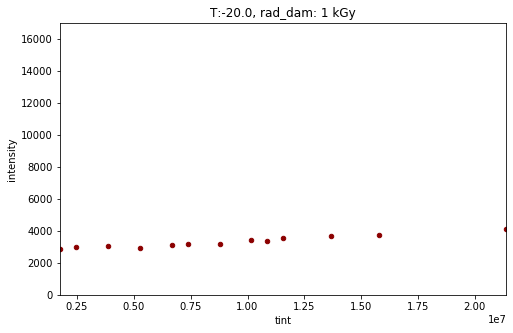

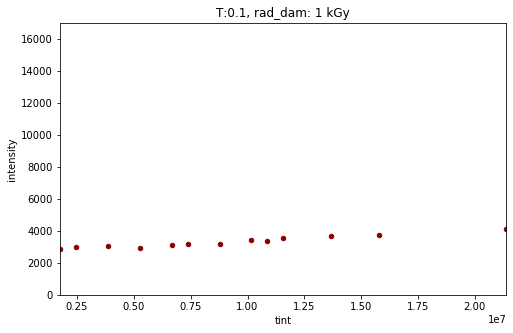

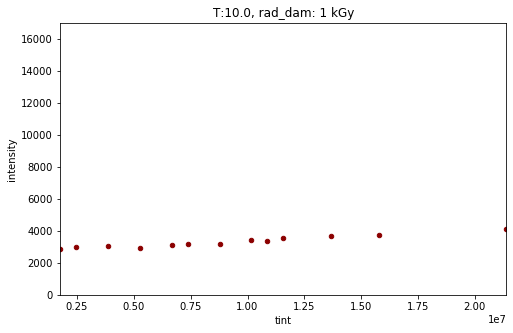

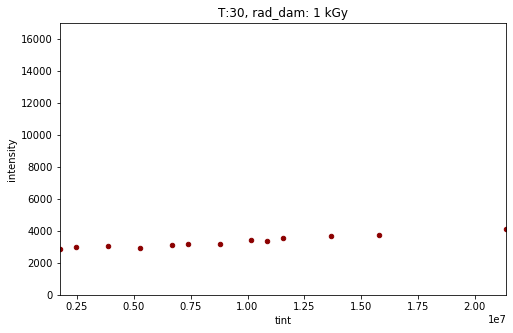

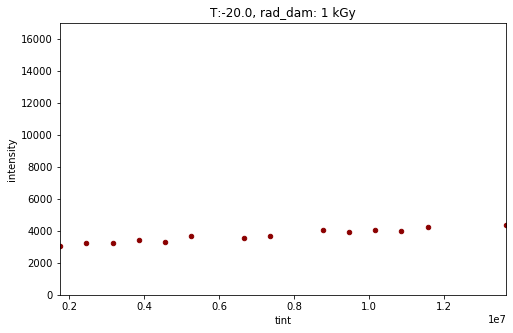

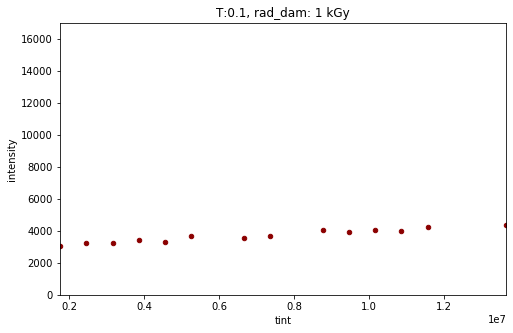

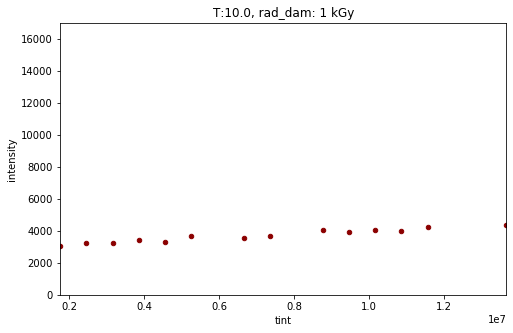

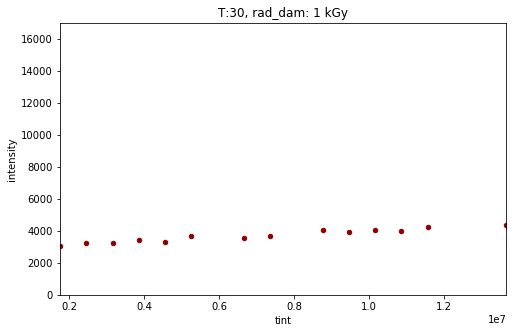

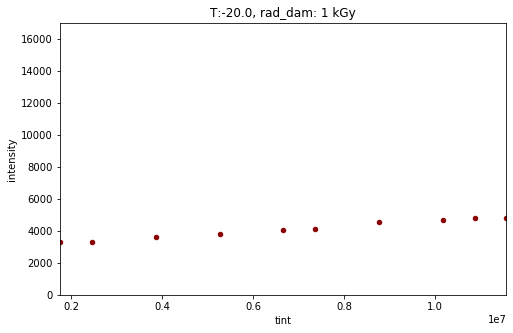

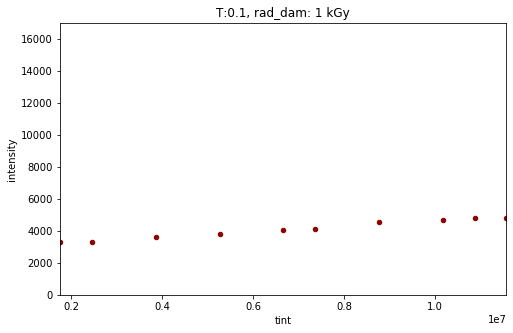

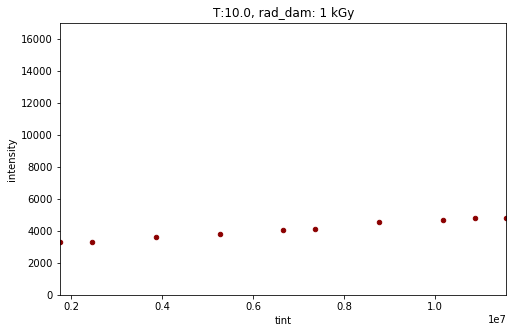

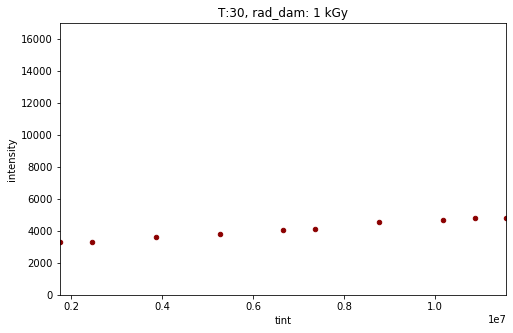

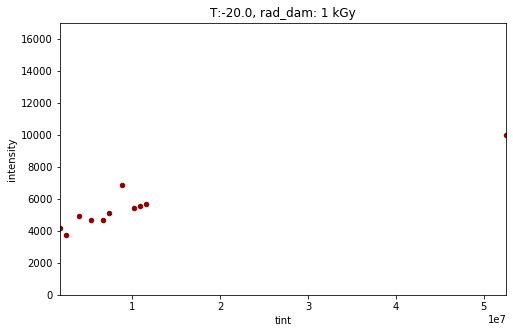

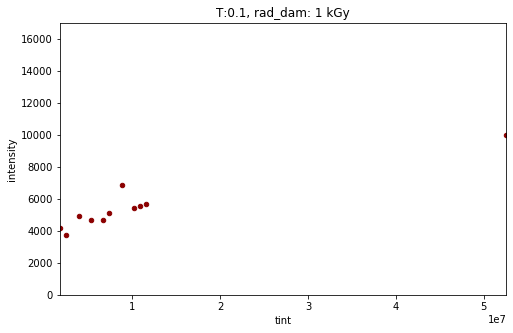

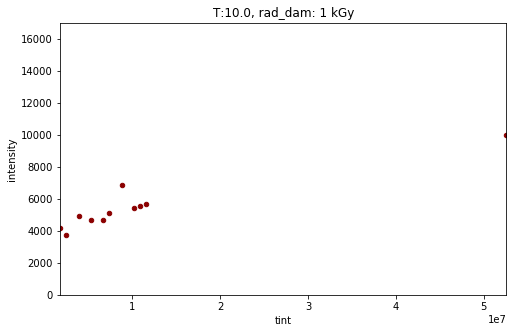

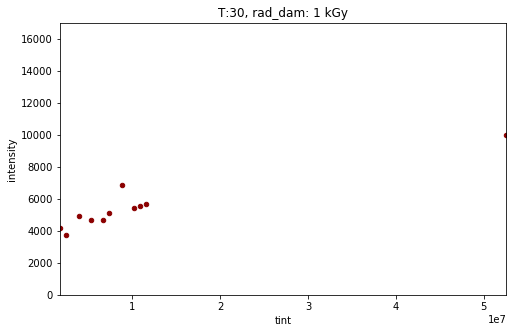

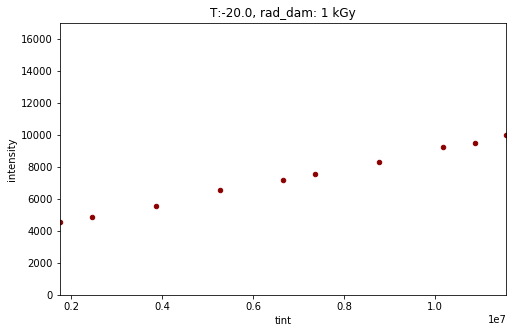

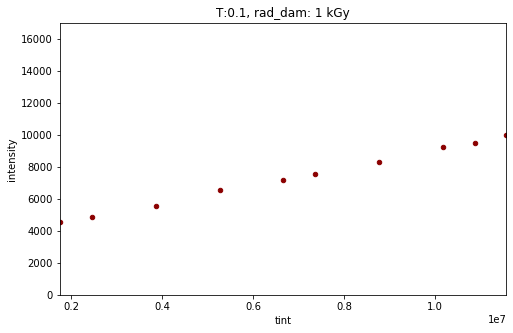

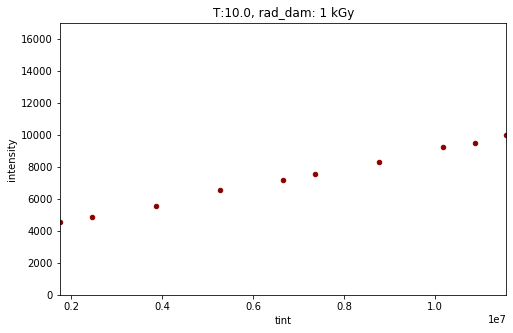

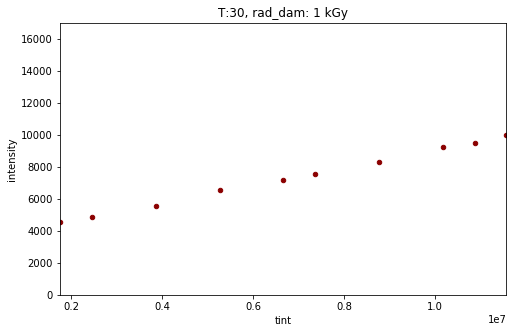

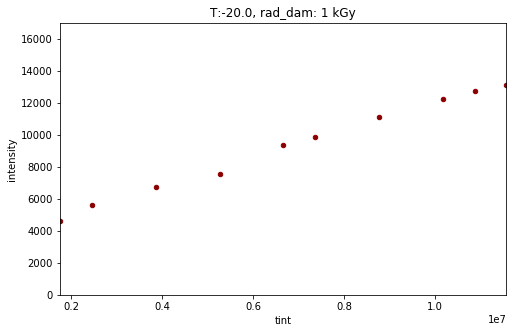

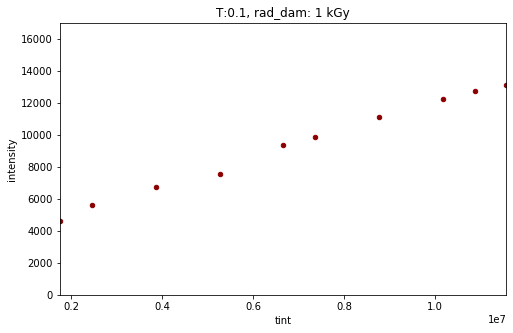

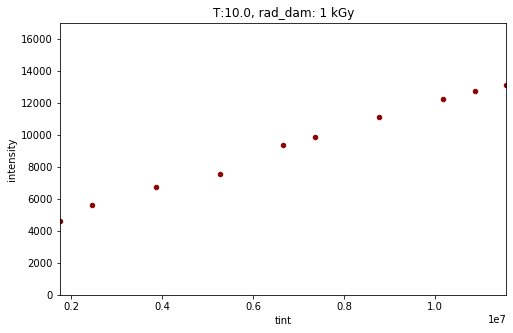

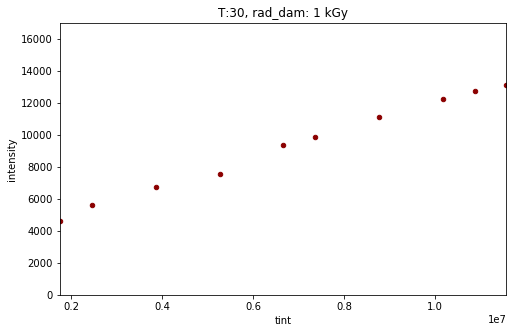

In [154]:
colors =['k','r','b','g','y','orange','dodgerblue','deeppink','slategrey','darkviolet','darkred']
cs = iter(colors)
plt.figure()
for (T, r), group in new_averaged.groupby(['T', 'rad_dam']):
    if r==1:
        for T in [-20.0, 0.1, 10., 30]:
            xx = np.array(group['tint'])
            yy = np.array(group['intensity'])
            cut = select_fit(yy)
            group.plot.scatter(x='tint', y = 'intensity', 
                               title = 'T:{}, rad_dam: {} kGy'.format(T,r), legend='pix intensity',figsize=(8,5),
                              ylim=(0,17000), xlim = (np.min(xx),np.max(xx)), c=col)
    plt.show()
